In [891]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats
import scipy.signal as scsig
import scipy.io as scio
import h5py
import sharpy.utils.h5utils as h5utils
import sharpy.utils.algebra as algebra
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize'] = (8, 6)
%config InlineBackend.figure_format = 'retina'

## Linearised system at AoA 0

In [304]:
path_to_case = './output/simple_HALE_uvlm_lm1_rom1_nmodes20/'

In [305]:
linss = scio.loadmat(path_to_case + 'simple_HALE_uvlm_lm1_rom1_nmodes20/simple_HALE_uvlm_lm1_rom1_nmodes20.linss.mat')
print(linss.keys())
ae_ss = scsig.dlti(linss['A'], linss['B'], linss['C'], linss['D'], dt=linss['dt'])

dict_keys(['__header__', '__version__', '__globals__', 'A', 'B', 'C', 'D', 'zeta', 'zeta_dot', 'u_ext', 'forces_aero', 'eta', 'eta_dot', 'forces_struct', 'forces_aero_beam_dof', 'mode_shapes', 'dt'])


[[0.11304668 0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.11304668 0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.11304668 0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.02210252 0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.05683173 0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.02074477
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  1.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         1.        ]]
0.1130466837888443


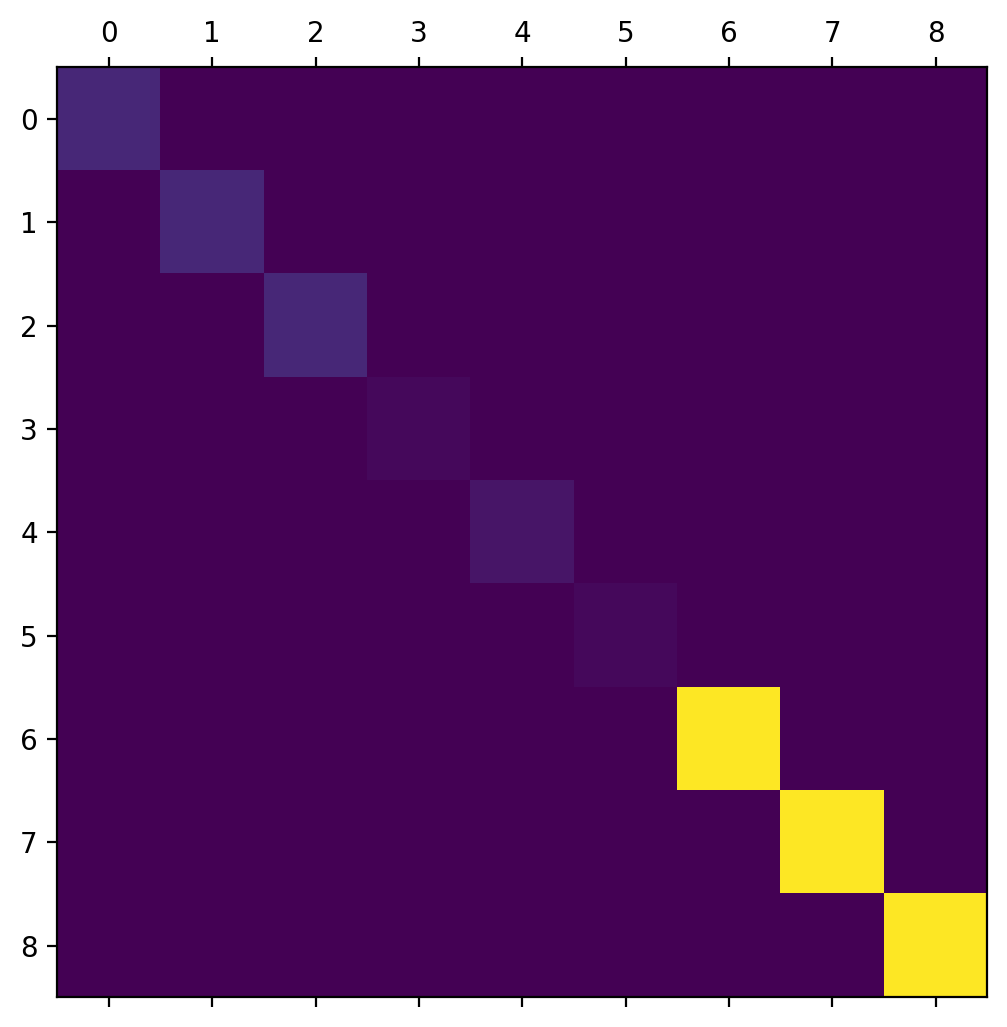

In [306]:
plt.matshow(linss['mode_shapes'][-9:, :9])
print(linss['mode_shapes'][-9:, :9])
print(linss['mode_shapes'][-9, 0])

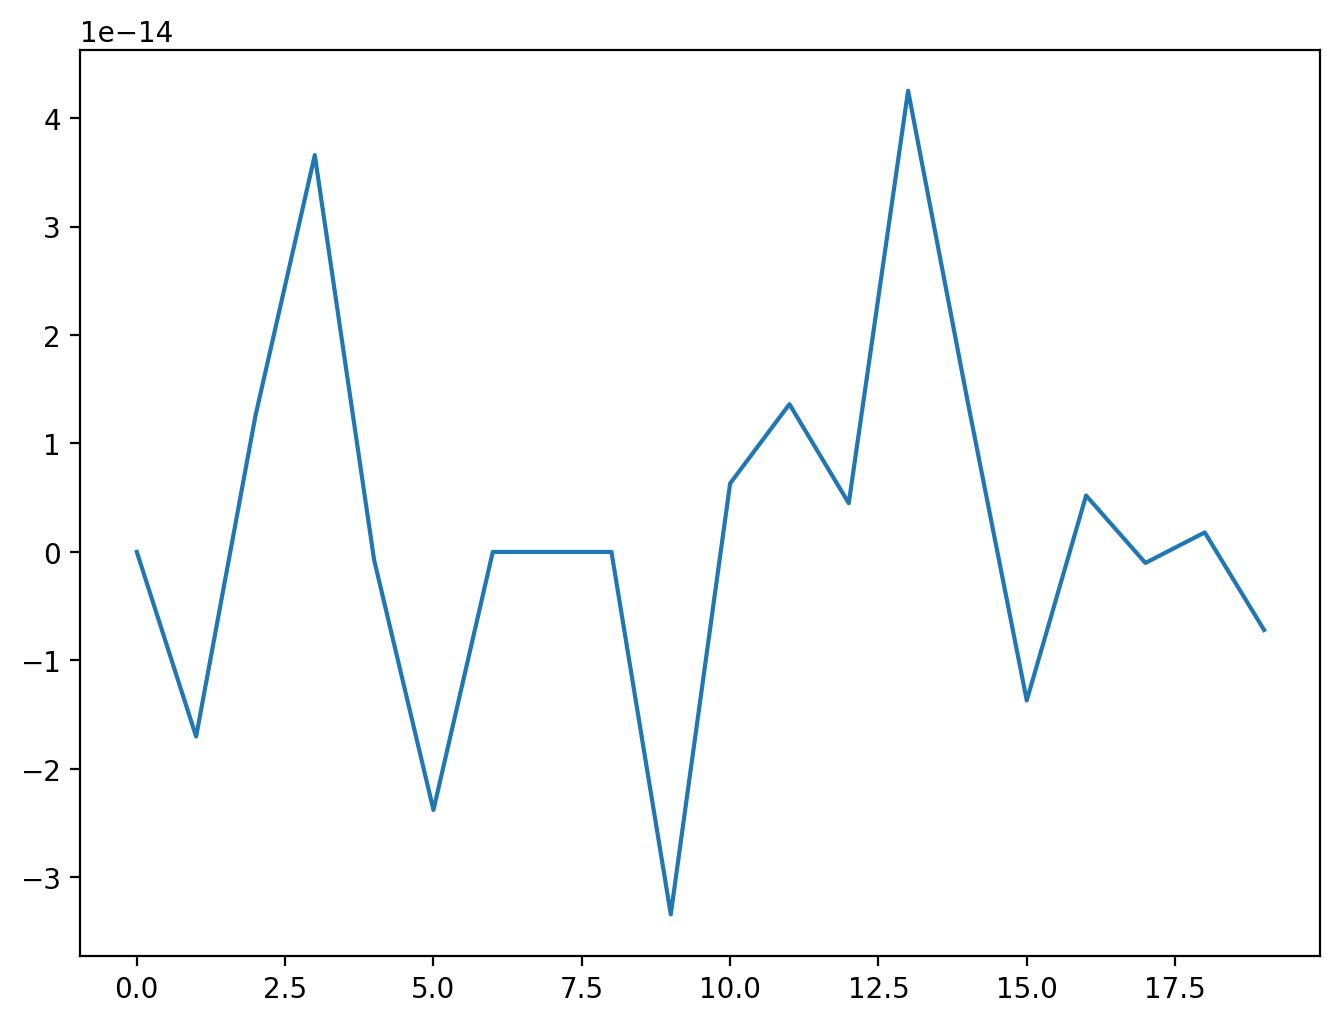

In [307]:
plt.plot(linss['forces_aero_beam_dof'].T)

In [308]:
linuvlm = scio.loadmat(path_to_case + '/simple_HALE_uvlm_lm1_rom1_nmodes20/simple_HALE_uvlm_lm1_rom1_nmodes20.uvlmss.mat')
print(linuvlm.keys())

Huvlm = linuvlm['C'].dot(np.linalg.inv(np.eye(linuvlm['A'].shape[0]) - linuvlm['A'])).dot(linuvlm['B']) + linuvlm['D']

dict_keys(['__header__', '__version__', '__globals__', 'A', 'B', 'C', 'D', 'zeta', 'zeta_dot', 'u_ext', 'forces_aero', 'dt'])


In [309]:
Huvlm.shape

(20, 44)

### Lift and drag slope

In [386]:
u_inf = 10

vx_ind = 20
vz_ind = 22
n_evals = 50
qs = 0.5 * 1.225 * (u_inf * u_inf) * 32
forces = np.zeros((n_evals, 4))
for i_alpha, alpha in enumerate(np.linspace(0, 5, n_evals)):
    u = np.zeros((linuvlm['B'].shape[1]))
#     dvz = u_inf * - np.sin(alpha * np.pi/180)
#     dvx = (1-np.cos(alpha * np.pi/180)) * u_inf
    
    V0 = np.array([-1, 0, 0]) * u_inf  #G
    Vp = u_inf * np.array([-np.cos(alpha* np.pi/180), 0 , -np.sin(alpha* np.pi/180)])   #G
    
    dvg = Vp - V0
    dva = dvg  # A
    dvz = dva[2]
    dvx = dva[0]
    
    u[vx_ind] = dvx / 0.11304668
    u[vz_ind] = dvz / 0.11304668
    
    flin = Huvlm.dot(u)[:3].real / 0.11304668
    forces[i_alpha, 0] = alpha
    forces[i_alpha, 1:] = flin / qs
    
np.savetxt('../07_ForceProfile/results/linear_alpha0000.txt', forces)

5.864067881027261


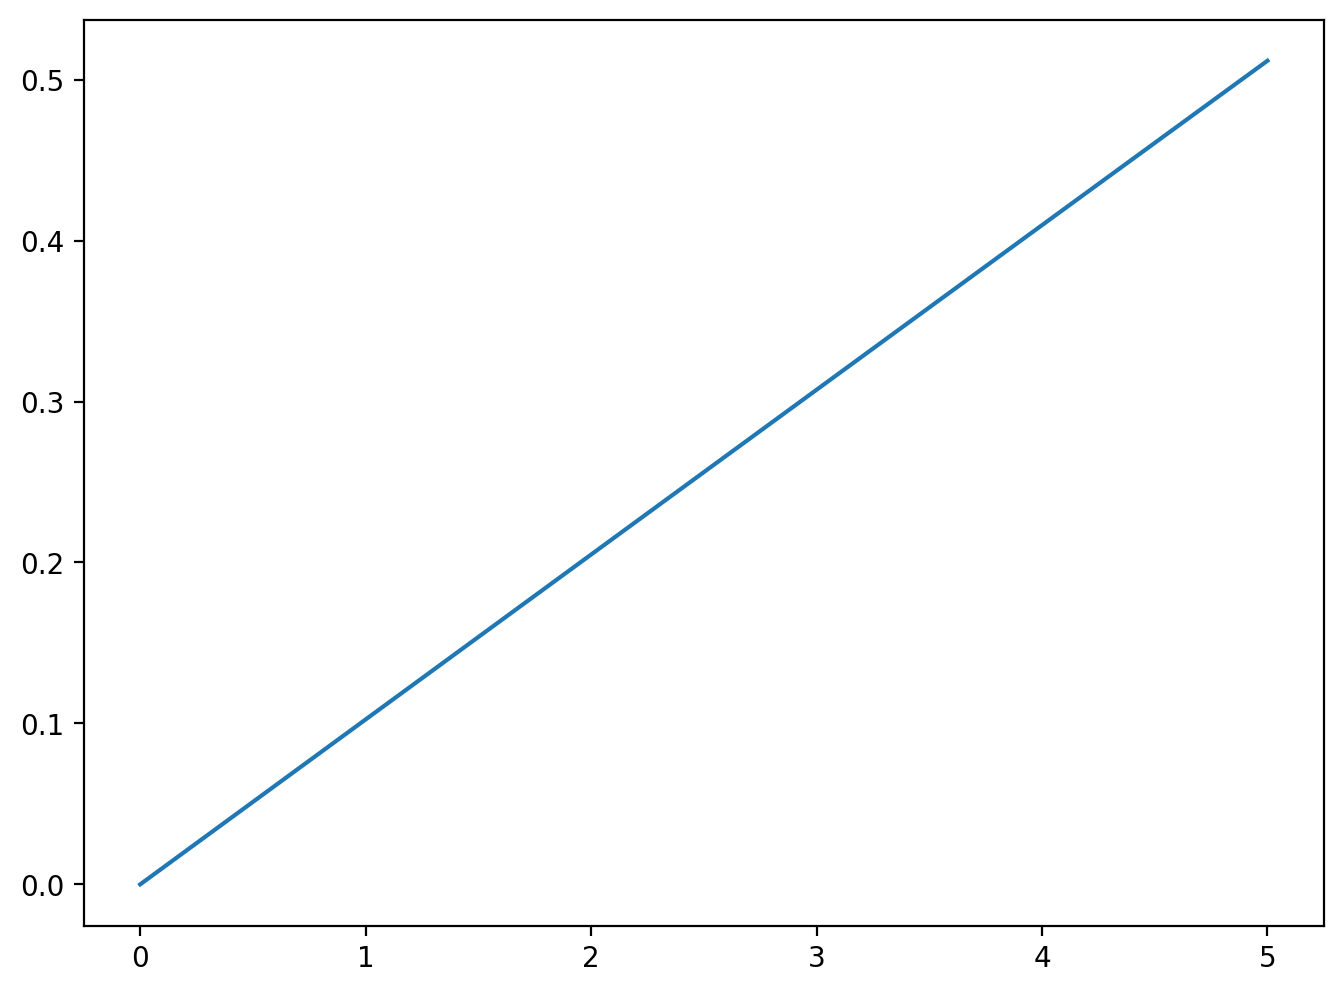

In [387]:
plt.plot(forces[:, 0], forces[:, -1])

slope = forces[-1, -1] / forces[-1, 0] / np.pi * 180
print(slope)

### Alpha=4 input

In [327]:
u = np.zeros((linuvlm['B'].shape[1]))

In [328]:


dvz = 20 * np.tan(1 * np.pi/180)
u[vz_ind] = dvz / 0.11304668
# dvx = -3.047e-3 / 0.113
# u[vx_ind] = 0.1
dvz

0.3491012985643517

In [329]:
flin = Huvlm.dot(u).real[:9]
flin.shape

(9,)

In [330]:
fl = [flin[0, 0], flin[0, 2]]

IndexError: too many indices for array

In [331]:
fl[1] * np.sin(1 * np.pi/180)

-1.5852618731210284

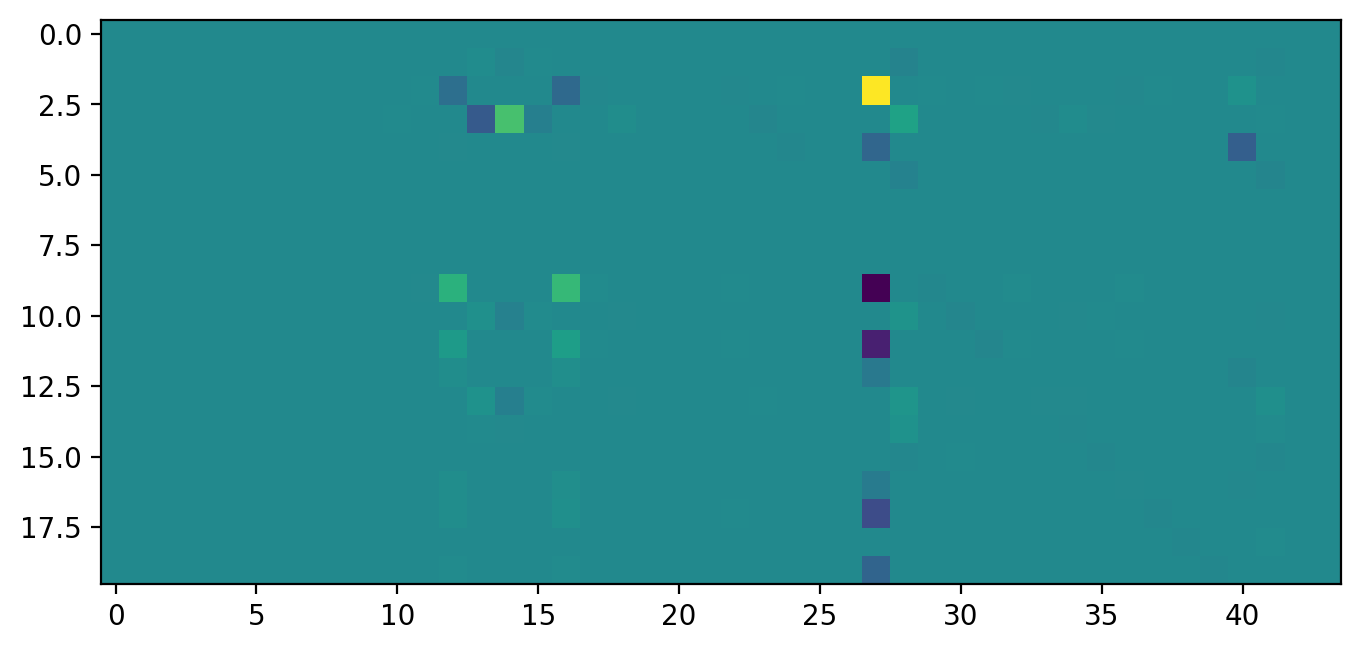

In [332]:
plt.imshow(Huvlm.real)

In [217]:
Huvlm[0, 20:].real

matrix([[-5.57984370e-32, -2.36201027e-16,  2.08946129e-16,
          5.13122594e-16, -1.66279178e-18, -3.34111944e-16,
          5.45789116e-28,  1.32728613e-14,  2.62872799e-14,
         -4.73896961e-16,  5.40879602e-17,  9.04887066e-17,
         -2.71608380e-17,  5.33876772e-16,  3.75147143e-16,
         -4.36355610e-16, -3.31732509e-17,  1.13385280e-17,
          2.00864590e-16, -7.24124740e-17, -7.08190976e-17,
          1.27971466e-14, -8.72035159e-17,  7.72523748e-17]])

# Linearised system at AoA 4

In [1001]:
aoa4 = scio.loadmat('./output/simple_HALE_uvlm_alpha0400_lm1_rom1_nmodes20/simple_HALE_uvlm_alpha0400_lm1_rom1_nmodes20/simple_HALE_uvlm_alpha0400_lm1_rom1_nmodes20.linss.mat')
uvlm4 = scio.loadmat('./output/simple_HALE_uvlm_alpha0400_lm1_rom1_nmodes20/simple_HALE_uvlm_alpha0400_lm1_rom1_nmodes20/simple_HALE_uvlm_alpha0400_lm1_rom1_nmodes20.uvlmss.mat')

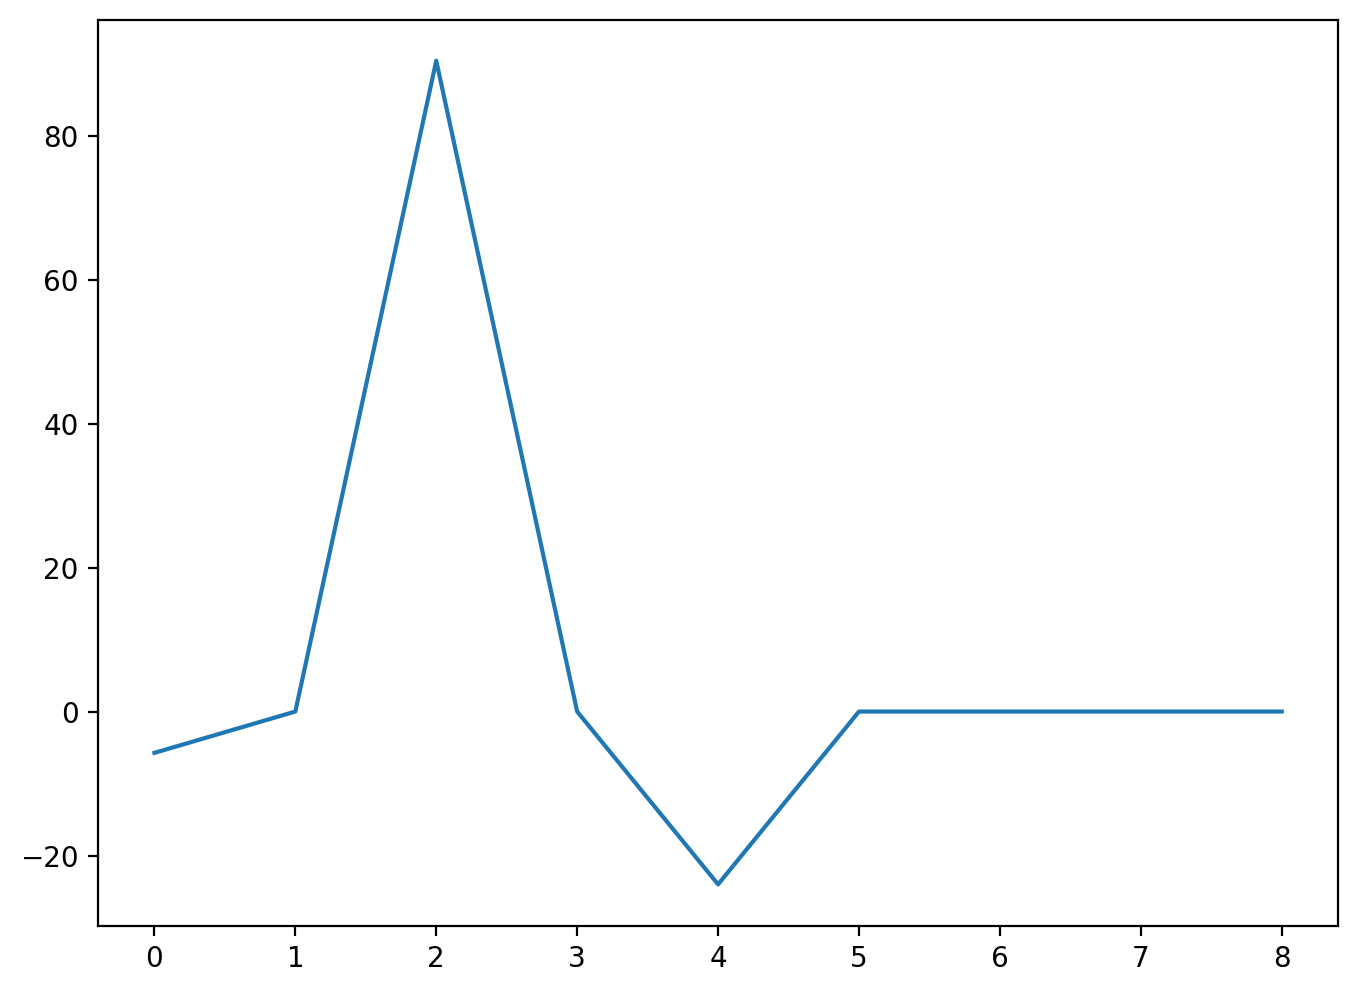

In [1002]:
aoa4['forces_aero_beam_dof'][0, :9]
plt.plot(aoa4['forces_aero_beam_dof'][0, :9].T)
# plt.plot(aoa4['forces_aero_beam_dof'][0, 9:].T)

In [1003]:
aoa4['forces_aero_beam_dof'].shape

(1, 20)

[[0.11304668 0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.11304668 0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.11304668 0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.02210252 0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.05683173 0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.02074477
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  1.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         1.        ]]


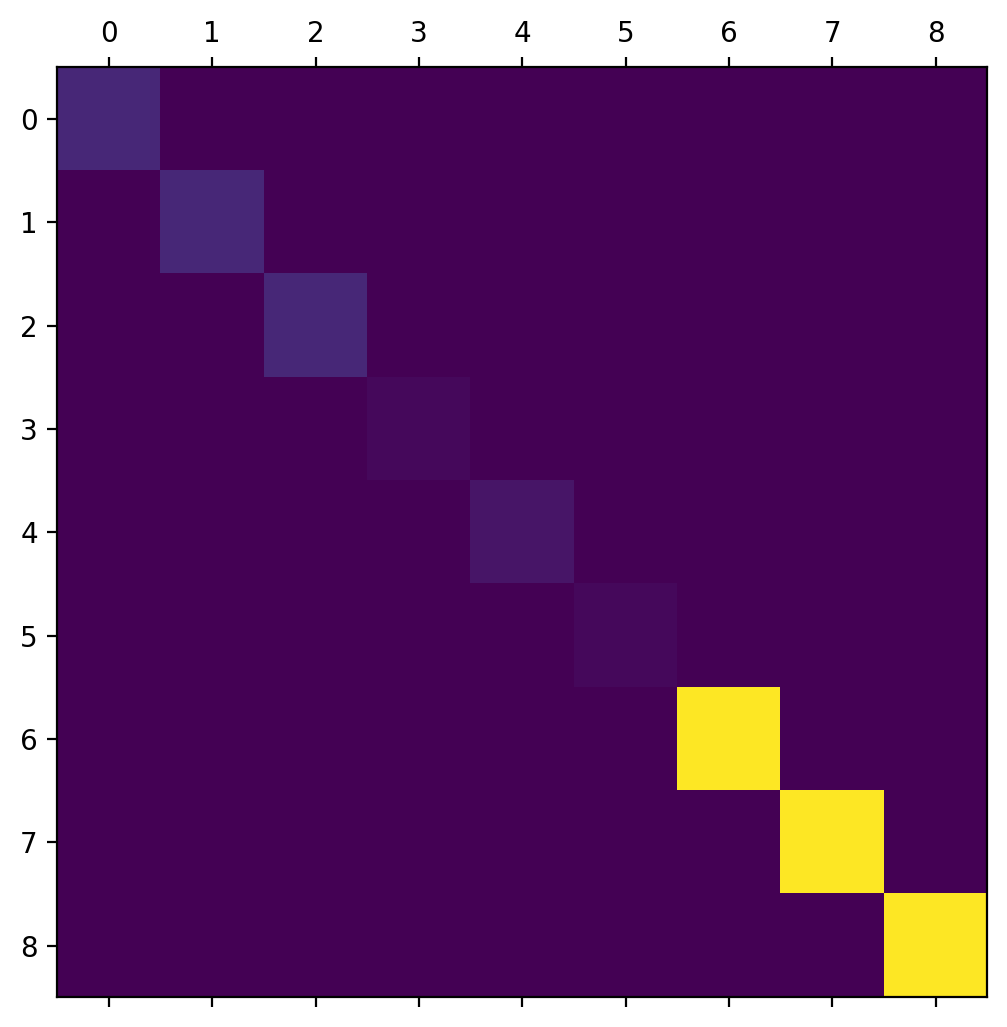

In [1004]:
plt.matshow(aoa4['mode_shapes'][-9:, :9])
print(aoa4['mode_shapes'][-9:, :9])

In [1005]:
H4 = uvlm4['C'].dot(np.linalg.inv(np.eye(uvlm4['A'].shape[0]) - uvlm4['A']).dot(uvlm4['B'])) + uvlm4['D']

In [1006]:
H4.shape

(20, 44)

In [1007]:
print(H4[2, 20:].real)

[-1.02469802e+00 -3.82544466e-14 -1.46521044e+01  4.45304223e-13
  7.94117078e+00 -2.41839152e-14 -1.62277975e-16 -7.32726474e-08
  4.77014998e-16 -1.37962029e+01  2.79775102e-06  1.12952120e+01
  1.06746624e+01  1.43444987e-05  7.48666541e-06  1.62779359e-05
 -1.57235768e+01 -6.14980668e+00 -4.93873651e-06  4.02390275e+00
  8.38669368e+01 -6.88078933e-13  6.72882783e+00 -1.06868387e-14]


In [1008]:
def plot_vec(v, v0=np.array([0, 0, 0]), norm=False, **kwargs):
    if norm:
        vmod = np.linalg.norm(v)
        v /= vmod
    plt.plot([v0[0], v[0]], [v0[2], v[2]], **kwargs)

dAlpha -4.0
dvA [-0.0243595   0.          0.69756474]
dvG [0.0243595  0.         0.69756474]
dfa [ 1.01540988e+02  4.54969013e-12 -7.97823769e+02]
dfg [ 4.56402669e+01  4.54969013e-12 -8.02963451e+02]
-4.0
f0A [-5.07704972e+01 -1.31471227e-13  7.99825020e+02]
f0G [ 5.14615023e+00 -1.31471227e-13  8.01418257e+02]
fa [5.07704913e+01 4.41821890e-12 2.00125130e+00]
fg [ 5.07864172e+01  4.41821890e-12 -1.54519409e+00]
fg2 [ 5.07864172e+01  4.41821890e-12 -1.54519409e+00]
dAlpha -3.9
dvA [-0.02434427  0.          0.68011145]
dvG [0.02315721 0.         0.68015291]
dfa [ 9.90004018e+01  4.43583821e-12 -7.77814325e+02]
dfg [ 4.45016573e+01  4.43583821e-12 -7.82825527e+02]
-3.9
f0A [-5.07704972e+01 -1.31471227e-13  7.99825020e+02]
f0G [ 3.74740437e+00 -1.31471227e-13  8.01426018e+02]
fa [4.82299046e+01 4.30436698e-12 2.20106953e+01]
fg [4.96152814e+01 4.30436698e-12 1.86793537e+01]
fg2 [4.96152814e+01 4.30436698e-12 1.86793537e+01]
dAlpha -3.8
dvA [-0.02429857  0.          0.66265822]
dvG [0.021

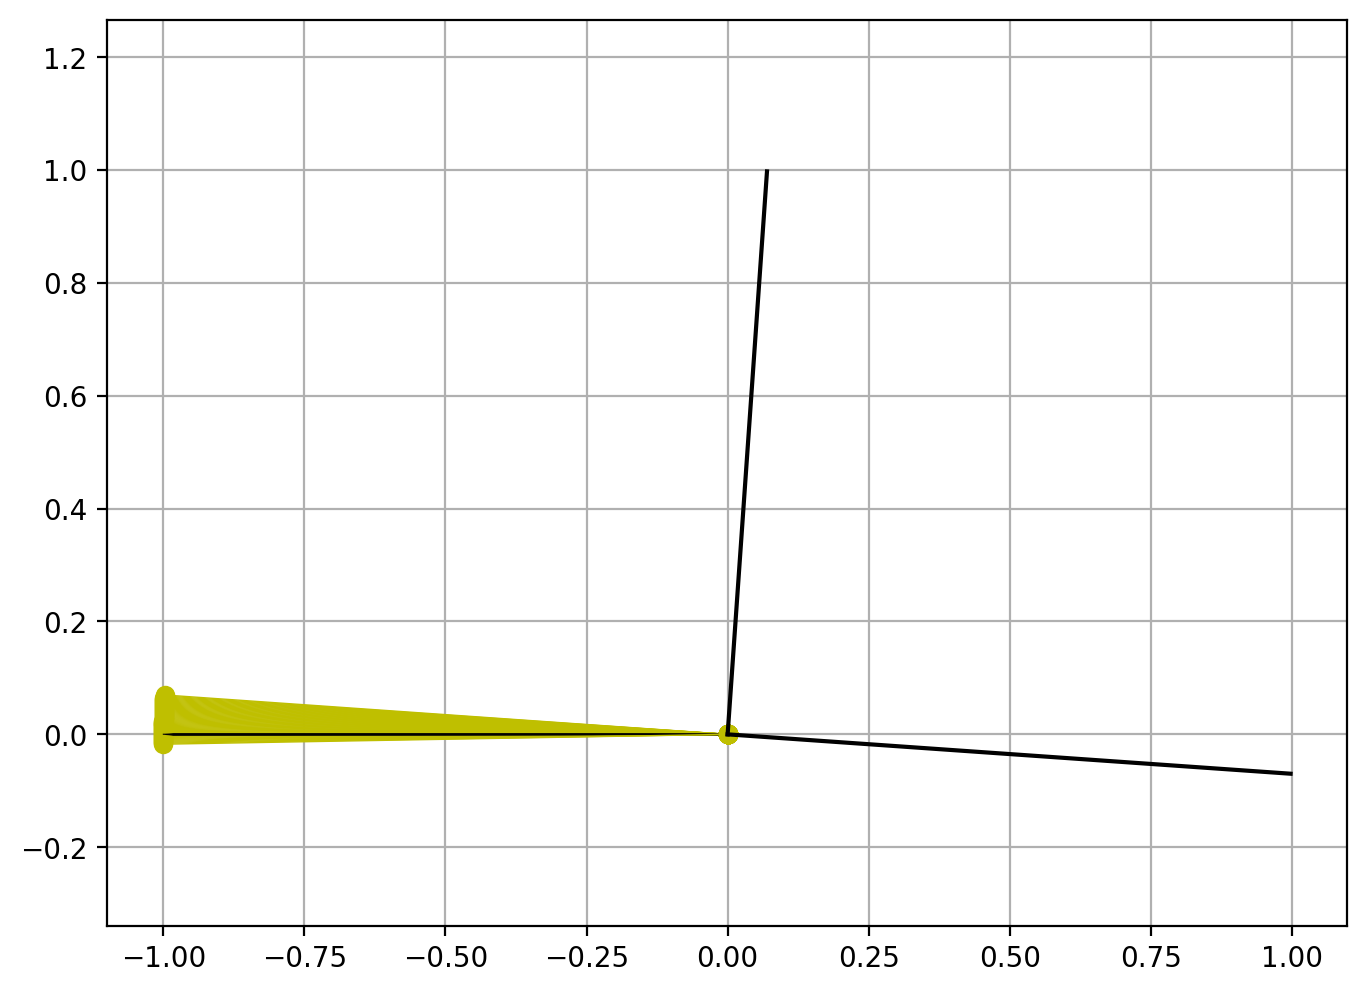

In [1009]:
u_inf = 10
alpha0 = 4 * np.pi/180
cga = algebra.quat2rotation(algebra.euler2quat(np.array([0, alpha0, 0])))

vx_ind = 20
vz_ind = 22
n_evals = 51
qs = 0.5 * 1.225 * (u_inf * u_inf) * 32
forces = np.zeros((n_evals, 4))
for i_alpha, dalpha in enumerate(np.linspace(-4, 1, n_evals)):
# for i_alpha, alpha in enumerate([-4, 0]):
    u = np.zeros((linuvlm['B'].shape[1]))
    V0 = np.array([-1, 0, 0], dtype=float) * u_inf  #G
    Vp = u_inf * np.array([-np.cos(dalpha* np.pi/180), 0 , -np.sin(dalpha * np.pi/180 )])  #G
    
    dvg = Vp - V0
    dva = cga.T.dot(dvg)  # A
    dvz = dva[2]
    dvx = dva[0]
    
    print('dAlpha', dalpha)
    print('dvA', dva)
    print('dvG', dvg)
        
    u[vx_ind] = dvx / 0.11304668
    u[vz_ind] = dvz / 0.11304668

#     u[27] = alpha * np.pi/180 # theta_dof
    
    flin = H4.dot(u)[:3].real / 0.11304668  # A
    print('dfa', flin)
    print('dfg', cga.dot(flin))


    F0A = aoa4['forces_aero_beam_dof'][0, :3] / 0.11304668  # A - forces at the linearisation
    LD0 = cga.dot(F0A)  # Lift and drag at the linearisation point
    
    alpha = alpha0 + dalpha * np.pi / 180

    cfa = algebra.quat2rotation(algebra.euler2quat(np.array([0, alpha, 0])))
    
    forces[i_alpha, 0] = alpha0 * 180 / np.pi + dalpha
    alpha = alpha0 * 0 + dalpha * np.pi / 180
    print(alpha * 180 / np.pi)
    dcga = algebra.quat2rotation(algebra.euler2quat(np.array([0, dalpha * np.pi/180, 0]))).T
    LD = cfa.dot(F0A + flin)
    forces[i_alpha, 1:] = LD / qs
    print('f0A', F0A)
    print('f0G', dcga.dot(F0A))
    print('fa', F0A + flin)
    print('fg', dcga.dot(F0A + flin))
    print('fg2', dcga.dot(F0A) + dcga.dot(flin))




#     plt.plot([0, V0[0]], [0, V0[2]], lw=0.5)
#     plt.plot([0, Vp[0]], [0, Vp[2]], lw=0.5)
    plot_vec(V0, norm=True, lw=0.5, color='k')
    plot_vec(Vp, norm=True, lw=0.5, color='y', marker='o')
    
# plot XA
xa = np.array([1, 0, 0])
za = np.array([0, 0, 1])

xa_g = cga.dot(xa)
za_g = cga.dot(za)

plot_vec(za_g, color='k')
plot_vec(xa_g, color='k')

plt.axis('equal')
plt.grid()
# np.savetxt('../07_ForceProfile/results/linear_alpha0400.txt', forces)

In [1010]:
F0A = aoa4['forces_aero_beam_dof'][0, :3]/ 0.11304668
print(F0A)

F0G = cga.dot(F0A)
print(F0G)

[-5.07704972e+01 -1.31471227e-13  7.99825020e+02]
[ 5.14615023e+00 -1.31471227e-13  8.01418257e+02]


5.8409363532639675
-0.23139623580400637


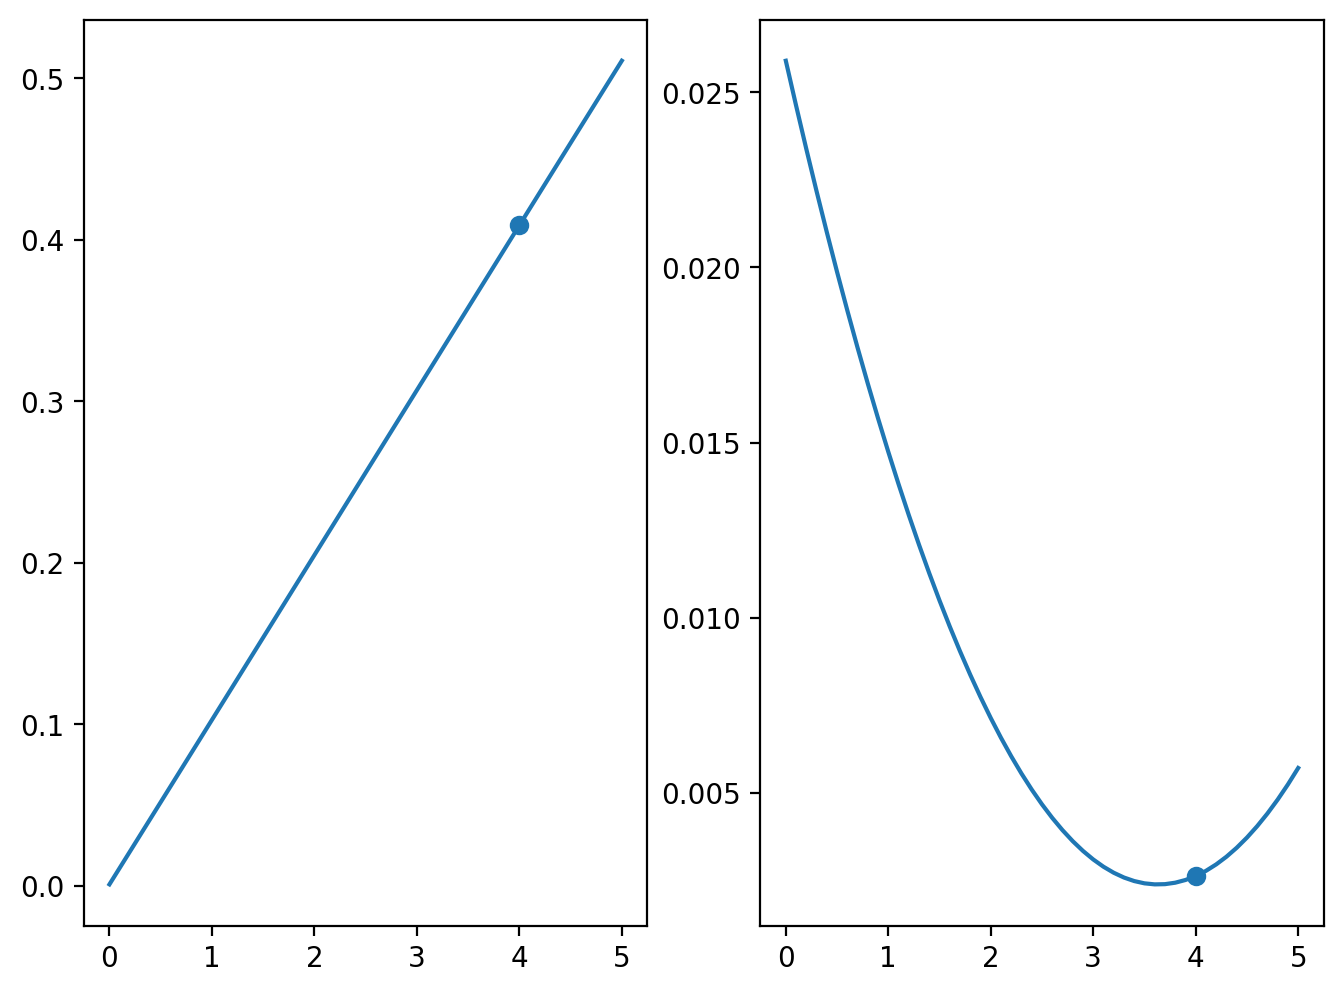

In [1011]:
fig, ax = plt.subplots(ncols=2)
ax[0].plot(forces[:, 0], forces[:, -1])
ax[1].plot(forces[:, 0], forces[:, 1])

ax[1].scatter(alpha0 * 180/np.pi, LD0[0]/qs)
ax[0].scatter(alpha0 * 180/np.pi, LD0[2]/qs)




slope = (forces[-1, -1] - forces[0, -1]) / (forces[-1, 0]- forces[0, 0]) / np.pi * 180
print(slope)

dslope = (forces[-1, 1] - forces[0, 1]) / (forces[-1, 0] - forces[0, 0]) / np.pi * 180
print(dslope)

### Using fully linearised rotations

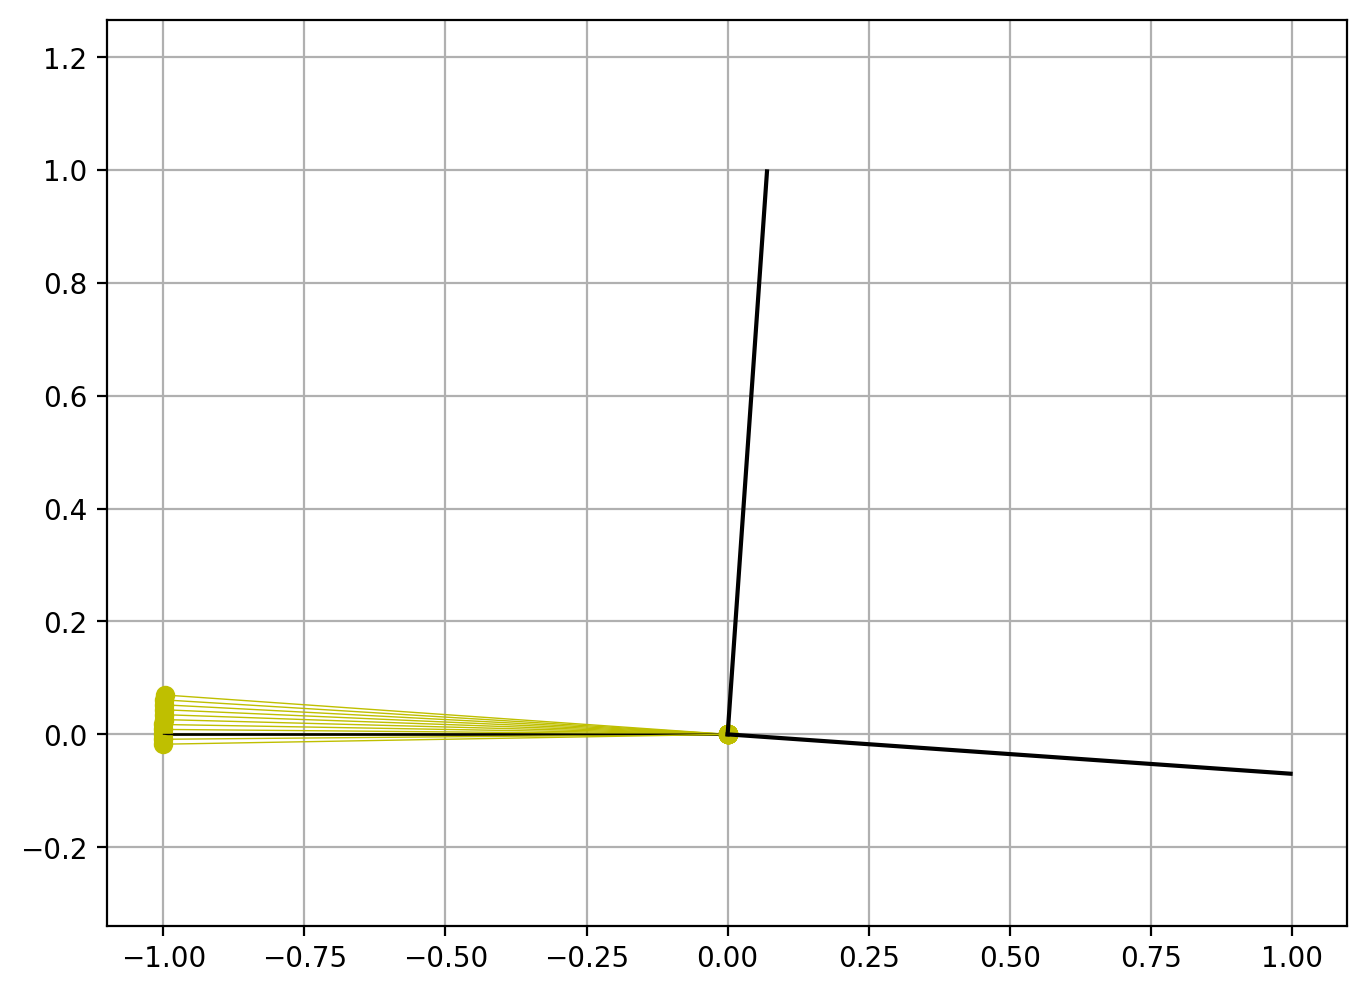

In [1012]:
u_inf = 10
alpha0 = 4 * np.pi/180
cga = algebra.quat2rotation(algebra.euler2quat(np.array([0, alpha0, 0])))

vx_ind = 20
vz_ind = 22
n_evals = 11
qs = 0.5 * 1.225 * (u_inf * u_inf) * 32
forces = np.zeros((n_evals, 4))
for i_alpha, dalpha in enumerate(np.linspace(-4, 1, n_evals)):
    u = np.zeros((linuvlm['B'].shape[1]))
    V0 = np.array([-1, 0, 0], dtype=float) * u_inf  #G
    Vp = u_inf * np.array([-np.cos(dalpha* np.pi/180), 0 , -np.sin(dalpha * np.pi/180 )])  #G
    
    dvg = Vp - V0
    dva = cga.T.dot(dvg)  # A
    dvz = dva[2]
    dvx = dva[0]
         
    u[vx_ind] = dvx / 0.11304668
    u[vz_ind] = dvz / 0.11304668

#     u[27] = alpha * np.pi/180 # theta_dof
    
    flin = H4.dot(u)[:3].real / 0.11304668  # A

    F0A = aoa4['forces_aero_beam_dof'][0, :3] / 0.11304668  # A - forces at the linearisation
    LD0 = cga.dot(F0A)  # Lift and drag at the linearisation point
    
    alpha = alpha0 + dalpha * np.pi / 180

    cfa = algebra.quat2rotation(algebra.euler2quat(np.array([0, alpha, 0])))
    deuler = np.array([0, dalpha* np.pi/180, 0])
    euler0 = np.array([0, alpha0, 0])
    
    forces[i_alpha, 0] = alpha0 * 180 / np.pi + dalpha
    alpha = alpha0 * 0 + dalpha * np.pi / 180
    LD = LD0 + algebra.der_Ceuler_by_v(euler0, F0A).dot(deuler) + cga.dot(flin)
    forces[i_alpha, 1:] = LD / qs

    plot_vec(V0, norm=True, lw=0.5, color='k')
    plot_vec(Vp, norm=True, lw=0.5, color='y', marker='o')
    
# plot XA
xa = np.array([1, 0, 0])
za = np.array([0, 0, 1])

xa_g = cga.dot(xa)
za_g = cga.dot(za)

plot_vec(za_g, color='k')
plot_vec(xa_g, color='k')

plt.axis('equal')
plt.grid()
np.savetxt('../07_ForceProfile/results/linear_alpha0400_linear.txt', forces)

5.859295681451616
0.07524495936717626


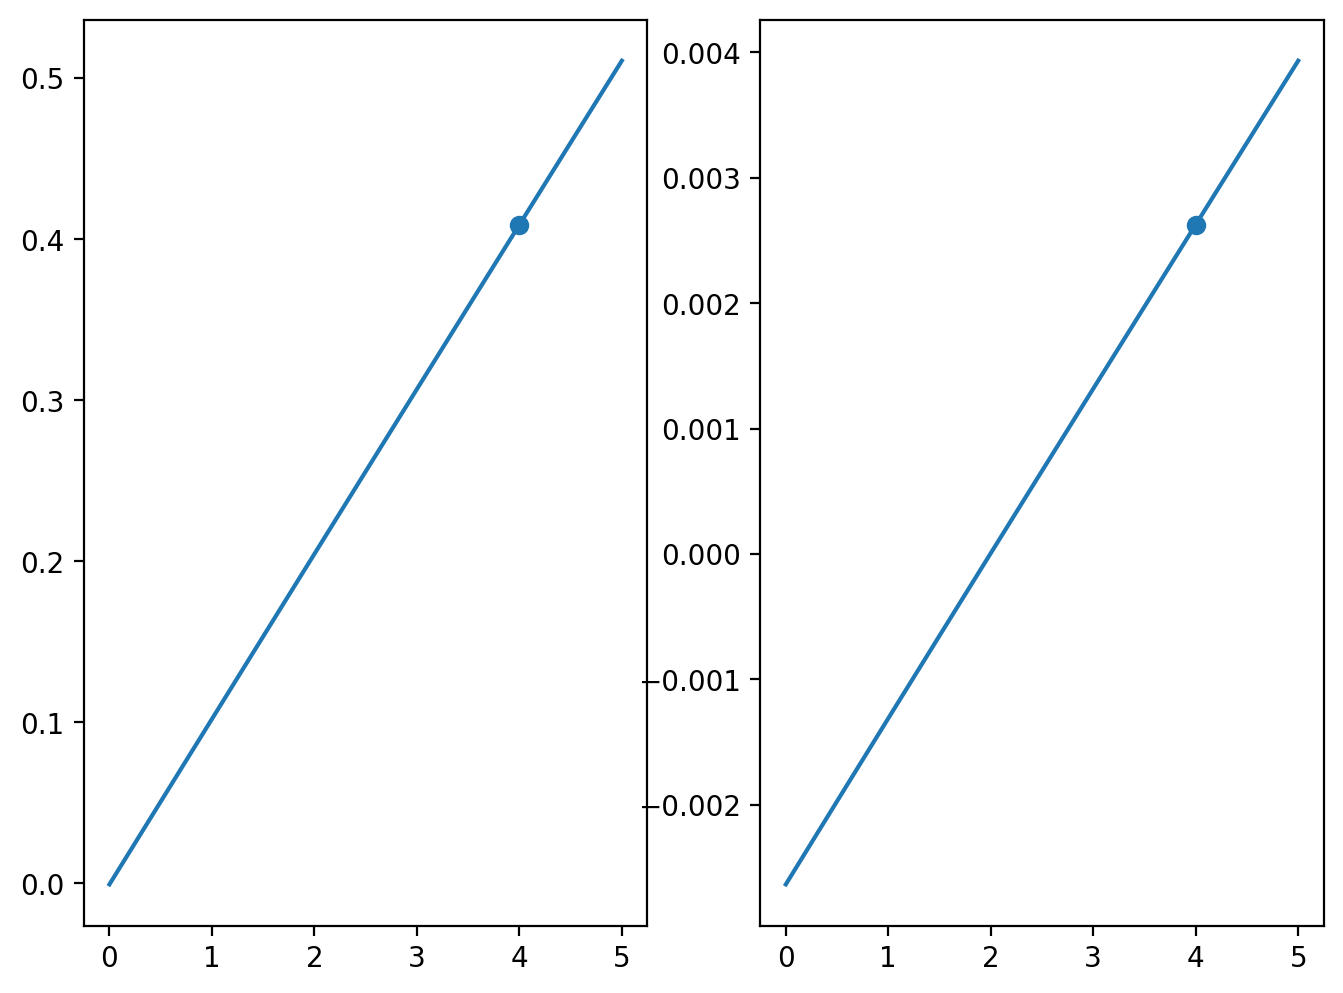

In [1013]:
fig, ax = plt.subplots(ncols=2)
ax[0].plot(forces[:, 0], forces[:, -1])
ax[1].plot(forces[:, 0], forces[:, 1])

ax[1].scatter(alpha0 * 180/np.pi, LD0[0]/qs)
ax[0].scatter(alpha0 * 180/np.pi, LD0[2]/qs)




slope = (forces[-1, -1] - forces[0, -1]) / (forces[-1, 0]- forces[0, 0]) / np.pi * 180
print(slope)

dslope = (forces[-1, 1] - forces[0, 1]) / (forces[-1, 0] - forces[0, 0]) / np.pi * 180
print(dslope)

## f4 = H4.dot(u)

In [1014]:
f4.real[:9]

array([ 2.88056273e+00, -1.44370662e-11, -9.07936412e+01,  4.15045013e-13,
        2.47820890e+01, -2.57829937e-11,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00])

In [1015]:
dvz

-0.17399269003532875

/home/ng213/anaconda3/envs/sharpy_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


[-3.45195376e+00 -1.55951250e-12  8.38669368e+01  8.73341238e-12
 -4.13314558e+02 -1.29767757e-12  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.88154458e+00  1.37551753e-06 -1.68561771e+00
  4.99359296e+01 -1.69820277e-05 -9.53060866e-06  2.79725544e-05
 -1.98500822e+01  2.92212665e+00 -1.49713454e-07 -1.51791143e+00]


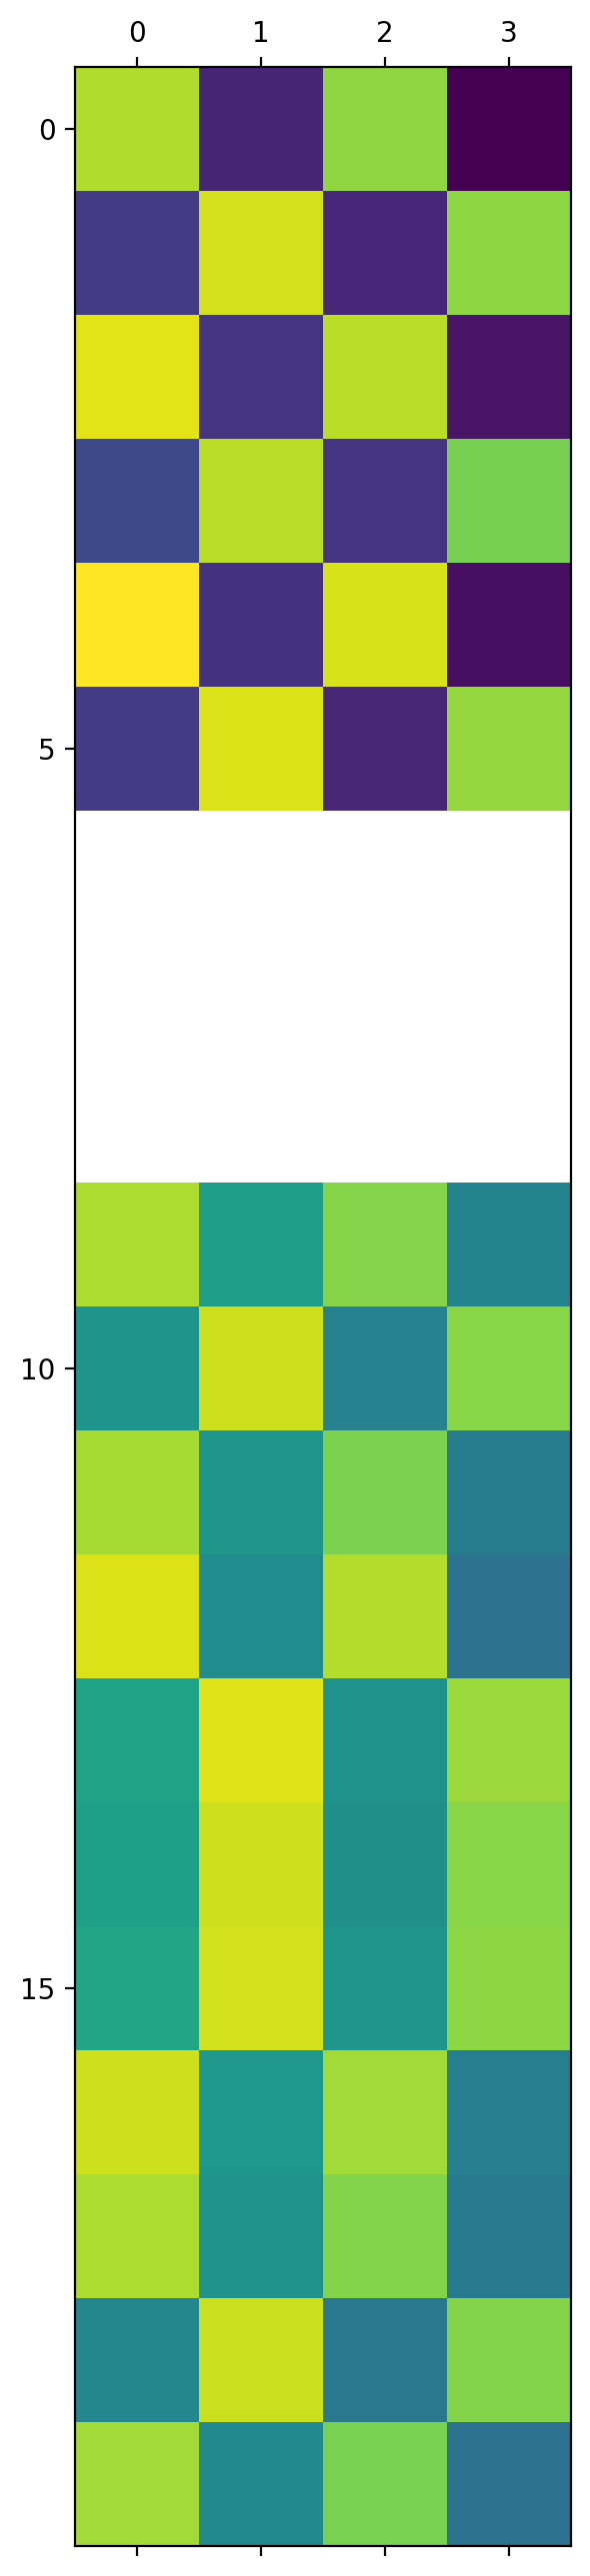

In [1016]:
plt.matshow(np.log10(np.abs(H4.real)[:, -4:]))
print(H4.real[:, -4])

In [833]:
H4[2, 20:].real

array([-1.02469802e+00, -3.82544466e-14, -1.46521044e+01,  4.45304223e-13,
        7.94117078e+00, -2.41839152e-14,  7.24471953e-13,  1.29209879e+03,
       -2.12454158e-12,  1.37962029e+01,  2.79775102e-06,  1.12952120e+01,
       -1.06746624e+01,  1.43444987e-05,  7.48666541e-06,  1.62779359e-05,
       -1.57235768e+01,  6.14980668e+00,  4.93873651e-06,  4.02390275e+00,
        8.38669368e+01, -6.88078933e-13,  3.50149849e-14, -1.06868387e-14])

In [236]:
np.max(Huvlm[0,:].real)

2.6287279913798245e-14

In [229]:
cga = algebra.euler2rot([0, np.pi/180, 0])

In [230]:
cga

array([[ 0.9998477 ,  0.        ,  0.01745241],
       [ 0.        ,  1.        ,  0.        ],
       [-0.01745241,  0.        ,  0.9998477 ]])

In [233]:
np.linalg.norm(cga.T.dot(flin[0, :3].T))

90.83342625659

In [235]:
np.linalg.norm(aoa4['forces_aero_beam_dof'][0, :3])

90.79598780580103

# Linearised Nodal SS at AoA = 4 (caution: big system)

In [577]:
nodalaoa4 = scio.loadmat('./output/simple_HALE_uvlm_alpha0400_lm1/simple_HALE_uvlm_alpha0400_lm1/simple_HALE_uvlm_alpha0400_lm1.linss.mat')
nodaluvlm4 = scio.loadmat('./output/simple_HALE_uvlm_alpha0400_lm1/simple_HALE_uvlm_alpha0400_lm1/simple_HALE_uvlm_alpha0400_lm1.uvlmss.mat')

In [578]:
nodalH4 = nodaluvlm4['C'].dot(np.linalg.inv(np.eye(nodaluvlm4['A'].shape[0]) - nodaluvlm4['A']).dot(nodaluvlm4['B'])) + nodaluvlm4['D']

In [579]:
nodalH4.shape

(393, 790)

In [1096]:
nodalH4.real[-9:, -4:]

matrix([[-3.05356482e+01,  2.65138200e-14, -4.52502619e-15,
          3.17880151e-16],
        [ 3.77812001e-14, -2.21368047e+02, -6.13320122e+00,
         -3.60961106e+00],
        [ 7.41878789e+02,  6.45218091e-15,  2.15548505e-14,
          1.19460482e-16],
        [ 2.88135849e-13,  2.72012587e+02,  7.30656869e+01,
          4.45628244e+00],
        [-7.27260248e+03,  1.06744945e-14, -2.38607959e-13,
         -1.30667619e-15],
        [ 3.85287175e-13, -2.19917437e+03, -5.66088702e+01,
         -3.59815901e+01],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00]])

In [630]:
num_dof = 393 * 2 + 4
vx_ind = num_dof - 9 - 4
vz_ind = num_dof - 7 - 4

In [631]:
print(nodalH4[-9, -13:])

[[-3.08485636e-15 -6.24343582e-15  1.45564958e+02  2.62147942e-13
  -1.02287030e+02 -1.18316815e-13  7.73194563e-17  3.95221348e-08
  -1.89385731e-16 -3.05356482e+01  2.65138200e-14 -4.52502619e-15
   3.17880151e-16]]


dAlpha -4.0
dvA [-0.0243595   0.          0.69756474]
dvG [0.0243595  0.         0.69756474]
(393, 1)
dfa [[ 1.01540982e+02 -3.67302013e-14 -7.97823715e+02]]
dfg [[ 4.56402639e+01]
 [-3.67302013e-14]
 [-8.02963398e+02]]
shape F0A (3,)
shape FA (1, 3)
f0A [-1.67412142e+00  4.44899762e-08  2.52984471e+01]
f0G [9.46871161e-02 4.44899762e-08 2.53536021e+01]
fa [[ 9.98668602e+01  4.44899395e-08 -7.72525268e+02]]
fg [[ 4.57349510e+01]
 [ 4.44899395e-08]
 [-7.77609795e+02]]
dAlpha 1.0
dvA [ 0.01369352  0.         -0.17399269]
dvG [ 0.00152305  0.         -0.17452406]
(393, 1)
dfa [[-2.53272386e+01  9.38306775e-15  1.98389364e+02]]
dfg [[-1.14266003e+01]
 [ 9.38306775e-15]
 [ 1.99672836e+02]]
shape F0A (3,)
shape FA (1, 3)
f0A [-1.67412142e+00  4.44899762e-08  2.52984471e+01]
f0G [9.46871161e-02 4.44899762e-08 2.53536021e+01]
fa [[-2.70013600e+01  4.44899856e-08  2.23687811e+02]]
fg [[-1.13319132e+01]
 [ 4.44899856e-08]
 [ 2.25026438e+02]]


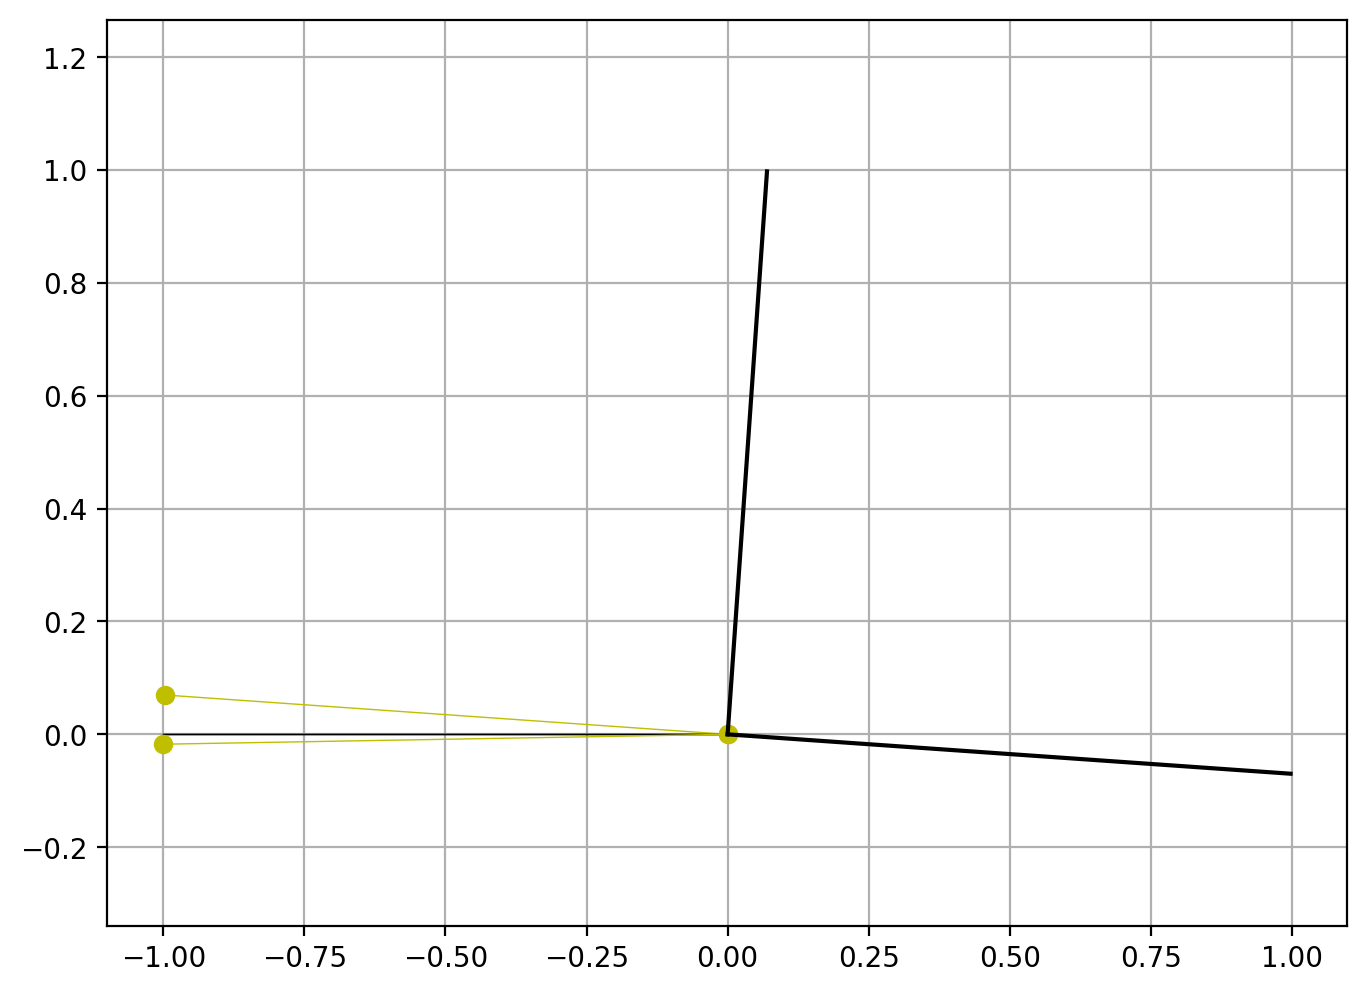

In [632]:
u_inf = 10
alpha0 = 4 * np.pi/180
cga = algebra.quat2rotation(algebra.euler2quat(np.array([0, alpha0, 0])))

n_evals = 2
qs = 0.5 * 1.225 * (u_inf * u_inf) * 32
forces = np.zeros((n_evals, 4))
for i_alpha, alpha in enumerate(np.linspace(-4, 1, n_evals)):
# for i_alpha, alpha in enumerate([-4, 0]):
    u = np.zeros((nodaluvlm4['B'].shape[1], 1))
    V0 = np.array([-1, 0, 0], dtype=float) * u_inf  #G
    Vp = u_inf * np.array([-np.cos(alpha* np.pi/180), 0 , -np.sin(alpha * np.pi/180 )])  #G
    
    dvg = Vp - V0
    dva = cga.T.dot(dvg)  # A
    dvz = dva[2]
    dvx = dva[0]
    
    print('dAlpha', alpha)
    print('dvA', dva)
    print('dvG', dvg)
        
    u[vx_ind] = dvx
    u[vz_ind] = dvz
    
    flin = nodalH4.dot(u).real  # A
    print(flin.shape)
    flin = flin[-9:-6, 0]
    flin = flin.reshape((1, 3))
    print('dfa', flin)
    print('dfg', cga.dot(flin.T))


    F0A = nodalaoa4['forces_aero_beam_dof'][0, :3]  # A - forces at the linearisation
    print('shape F0A', F0A.shape)
    FA = F0A + flin
    print('shape FA', FA.shape)


    forces[i_alpha, 0] = alpha0 * 180 / np.pi + alpha
    forces[i_alpha, 1:] = cga.dot(FA.T).T / qs
    print('f0A', F0A)
    print('f0G', cga.dot(F0A))
    print('fa', FA)
    print('fg', cga.dot(FA.T))


#     plt.plot([0, V0[0]], [0, V0[2]], lw=0.5)
#     plt.plot([0, Vp[0]], [0, Vp[2]], lw=0.5)
    plot_vec(V0, norm=True, lw=0.5, color='k')
    plot_vec(Vp, norm=True, lw=0.5, color='y', marker='o')
    
# plot XA
xa = np.array([1, 0, 0])
za = np.array([0, 0, 1])

xa_g = cga.dot(xa)
za_g = cga.dot(za)

plot_vec(za_g, color='k')
plot_vec(xa_g, color='k')

plt.axis('equal')
plt.grid()

5.861920875373567
-0.3336418842126323


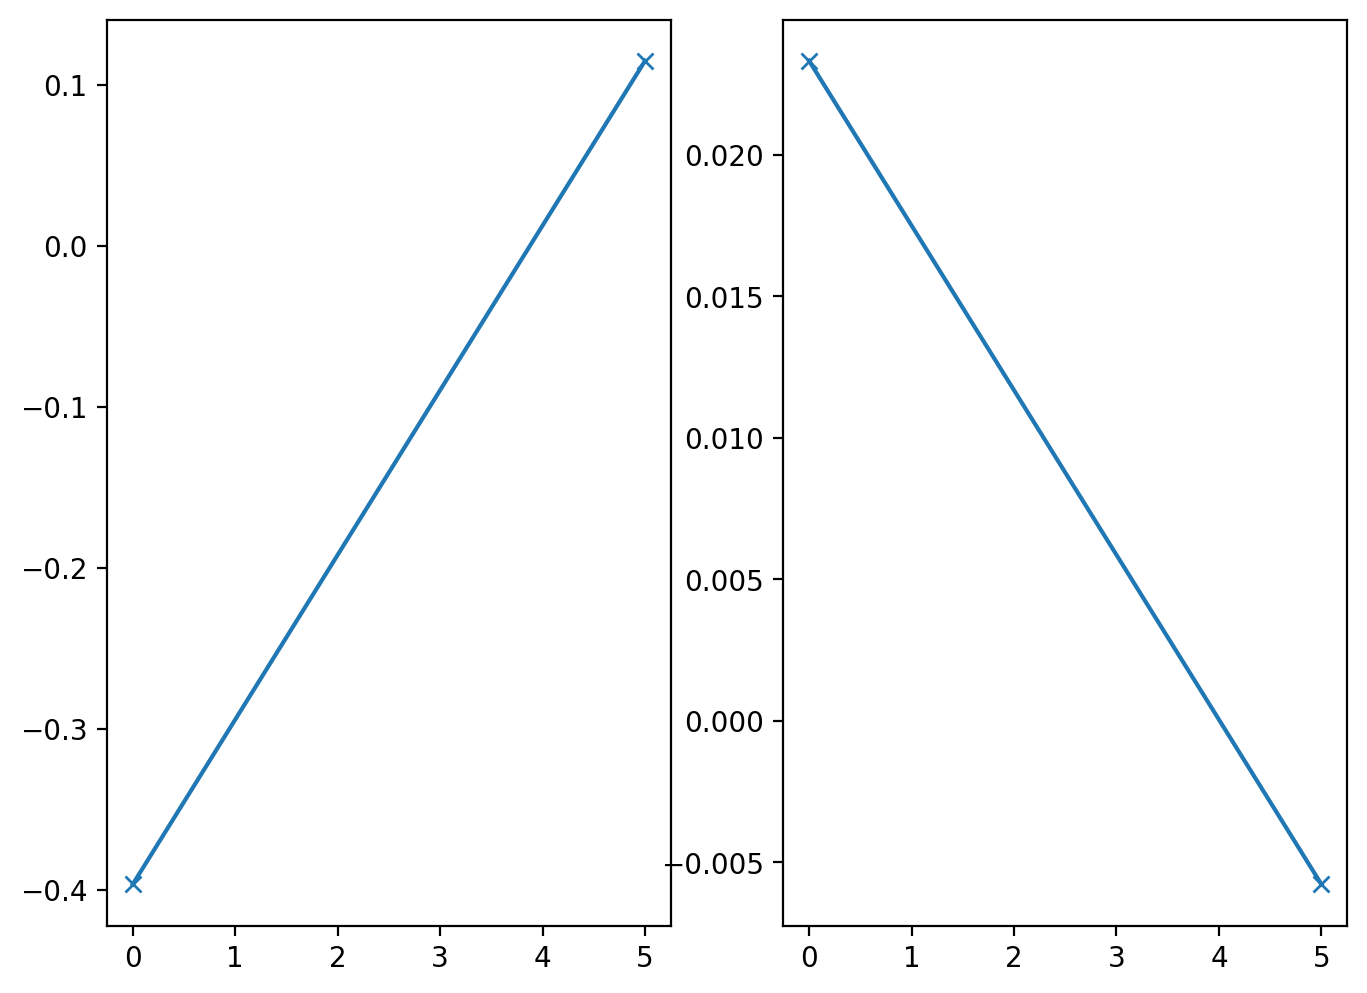

In [634]:
fig, ax = plt.subplots(ncols=2)
ax[0].plot(forces[:, 0], forces[:, -1], marker='x')
ax[1].plot(forces[:, 0], forces[:, 1], marker='x')


slope = (forces[-1, -1] - forces[0, -1]) / (forces[-1, 0]- forces[0, 0]) / np.pi * 180
print(slope)

dslope = (forces[-1, 1] - forces[0, 1]) / (forces[-1, 0] - forces[0, 0]) / np.pi * 180
print(dslope)

In [635]:
nodalH4.real[-9:, -13:]

matrix([[-3.08485636e-15, -6.24343582e-15,  1.45564958e+02,
          2.62147942e-13, -1.02287030e+02, -1.18316815e-13,
          7.73194563e-17,  3.95221348e-08, -1.89385731e-16,
         -3.05356482e+01,  2.65138200e-14, -4.52502619e-15,
          3.17880151e-16],
        [ 2.90775555e-14, -5.93319286e+01, -5.16394890e-14,
          1.03455498e+03,  6.11010501e-14, -4.41297677e+02,
         -2.29109511e-07, -1.95784466e-16, -3.06348792e-07,
          3.77812001e-14, -2.21368047e+02, -6.13320122e+00,
         -3.60961106e+00],
        [-8.01826198e+01, -1.91874568e-14, -1.14652717e+03,
          4.47814032e-13,  1.23604948e+03,  3.75885500e-13,
         -1.43548305e-15, -6.48162732e-07,  4.21962484e-15,
          7.41878789e+02,  6.45218091e-15,  2.15548505e-14,
          1.19460482e-16],
        [-1.95738757e-13,  1.17962565e+03,  1.63592401e-12,
         -8.11573542e+04, -5.43548714e-13,  6.87393800e+03,
          5.12302484e-06,  9.28464569e-15, -1.40547994e-06,
          2.8813584

In [637]:
H4.real[:9, 10:]

array([[-1.34903089e-07, -2.33645799e-01,  1.53956944e+01,
         4.34308213e-06,  3.39440951e-06, -2.29286781e-05,
         1.86895230e+01,  7.26328927e-01, -2.17761187e-06,
         1.37858817e-01, -3.94230845e-17,  2.77125559e-15,
         1.86025505e+00, -2.33164106e-14, -6.57157164e-01,
         2.55266371e-15,  8.74081758e-18,  4.46784627e-09,
        -2.14094568e-17, -1.66354561e+00, -3.59955858e-07,
        -1.50591665e+00,  5.02164025e-01, -2.18116502e-06,
        -1.22516288e-06, -4.87785970e-07,  7.26277864e-01,
        -8.31656450e-01, -4.92239306e-07, -5.55637178e-01,
        -3.45195376e+00,  8.17098592e-14, -1.48333061e-15,
         1.26282285e-15],
       [-7.37579016e+00, -8.70022045e-07,  3.43476646e-06,
         3.00129272e+01, -2.93290360e+01,  1.04579911e+01,
        -2.25206636e-06, -5.72948686e-07, -1.44896759e+01,
         1.92510250e-07,  3.71598153e-16, -7.58235510e-01,
         8.33643815e-14,  2.58495578e+00, -1.09192856e-13,
        -1.03489918e+00, -2.59

# Linearised at alpha 2

In [988]:
aoa2 = scio.loadmat('./output/simple_HALE_uvlm_alpha0200_lm1_rom1_nmodes20/simple_HALE_uvlm_alpha0200_lm1_rom1_nmodes20/simple_HALE_uvlm_alpha0200_lm1_rom1_nmodes20.linss.mat')
uvlm2 = scio.loadmat('./output/simple_HALE_uvlm_alpha0200_lm1_rom1_nmodes20/simple_HALE_uvlm_alpha0200_lm1_rom1_nmodes20/simple_HALE_uvlm_alpha0200_lm1_rom1_nmodes20.uvlmss.mat')

In [989]:
H2 = uvlm2['C'].dot(np.linalg.inv(np.eye(uvlm2['A'].shape[0]) - uvlm2['A']).dot(uvlm2['B'])) + uvlm2['D']

In [990]:
aoa2['mode_shapes'][-9,0]

0.1130466837888443

dAlpha -2.0
dvA [-0.00609173  0.          0.34899497]
dvG [0.00609173 0.         0.34899497]
dfa [ 2.54557232e+01 -7.36158692e-12 -4.00908900e+02]
dfg [ 1.14486974e+01 -7.36158692e-12 -4.01553069e+02]
f0A [-1.27278641e+01 -1.43956900e-13  4.01184572e+02]
f0G [ 1.28102898e+00 -1.43956900e-13  4.01384377e+02]
fa [ 1.27278591e+01 -7.50554382e-12  2.75671854e-01]
fg [ 1.27297264e+01 -7.50554382e-12 -1.68691953e-01]
fg2 [ 1.27297264e+01 -7.50554382e-12 -1.68691953e-01]
dAlpha -1.5
dvA [-0.00571096  0.          0.26172961]
dvG [0.00342675 0.         0.26176948]
dfa [ 1.90905806e+01 -5.52087338e-12 -3.00616726e+02]
dfg [ 8.58757874e+00 -5.52087338e-12 -3.01099850e+02]
f0A [-1.27278641e+01 -1.43956900e-13  4.01184572e+02]
f0G [ 1.28102898e+00 -1.43956900e-13  4.01384377e+02]
fa [ 6.36271649e+00 -5.66483028e-12  1.00567846e+02]
fg [ 9.86860772e+00 -5.66483028e-12  1.00284527e+02]
fg2 [ 9.86860772e+00 -5.66483028e-12  1.00284527e+02]
dAlpha -1.0
dvA [-0.00456868  0.          0.1744709 ]
dvG [0.0

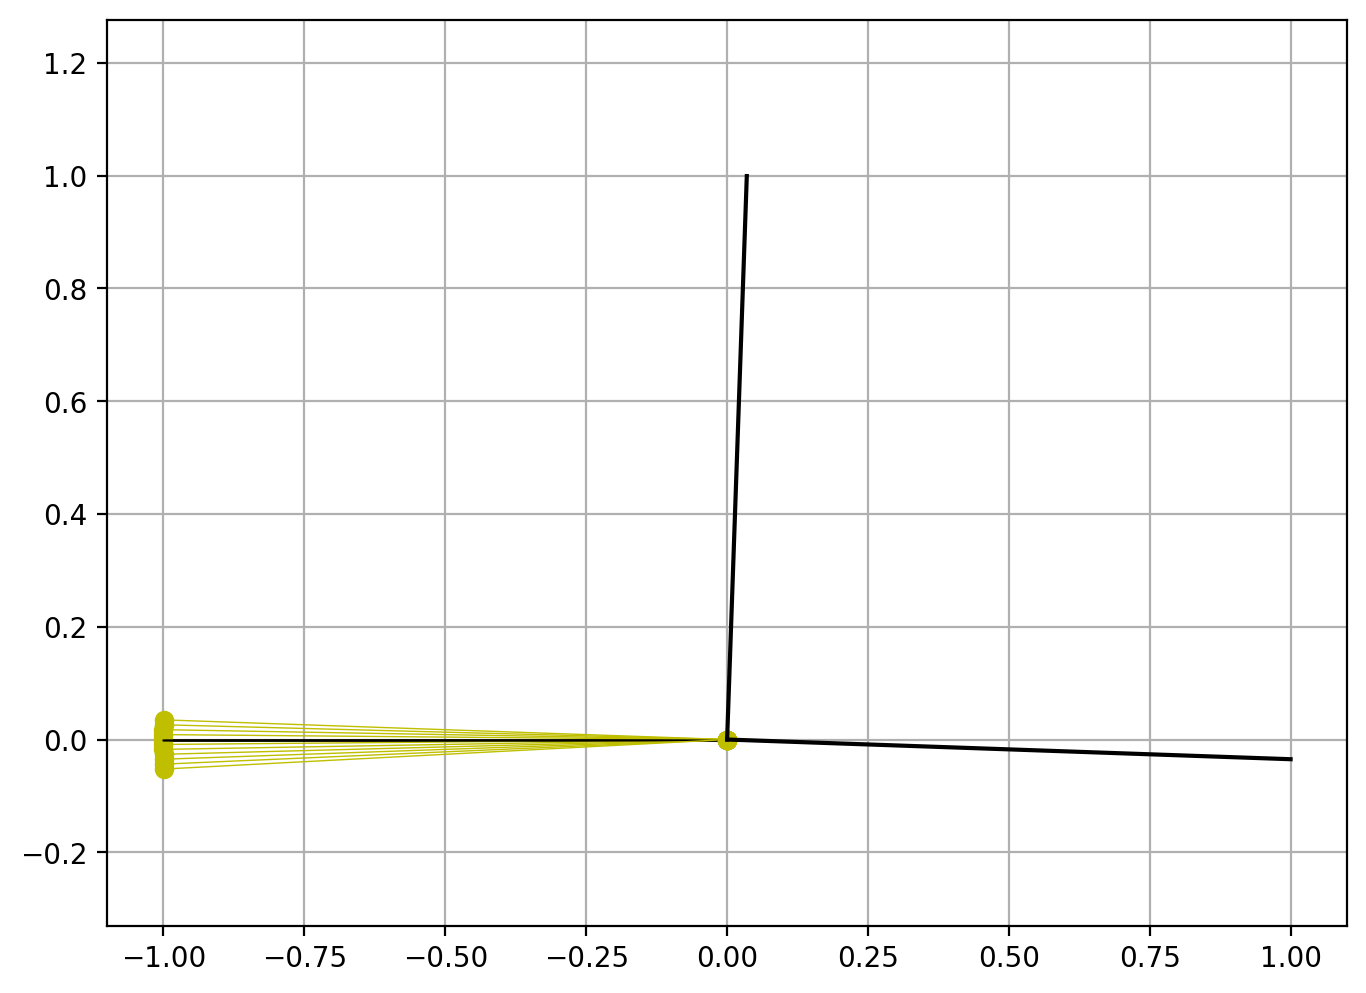

In [991]:
u_inf = 10
alpha0 = 2 * np.pi/180
cga = algebra.quat2rotation(algebra.euler2quat(np.array([0, alpha0, 0])))

vx_ind = 20
vz_ind = 22
n_evals = 11
qs = 0.5 * 1.225 * (u_inf * u_inf) * 32
forces = np.zeros((n_evals, 4))
for i_alpha, dalpha in enumerate(np.linspace(-2, 3, n_evals)):
# for i_alpha, alpha in enumerate([-4, 0]):
    u = np.zeros((uvlm2['B'].shape[1]))
    V0 = np.array([-1, 0, 0], dtype=float) * u_inf  #G
    Vp = u_inf * np.array([-np.cos(dalpha* np.pi/180), 0 , -np.sin(dalpha * np.pi/180 )])  #G
    
    dvg = Vp - V0
    dva = cga.T.dot(dvg)  # A
    dvz = dva[2]
    dvx = dva[0]
    
    print('dAlpha', dalpha)
    print('dvA', dva)
    print('dvG', dvg)
        
    u[vx_ind] = dvx / aoa2['mode_shapes'][-9,0]
    u[vz_ind] = dvz / aoa2['mode_shapes'][-7,2]
    
#     u[27] = dalpha * np.pi/180
    
    flin = H2.dot(u)[:3].real / 0.11304668  # A
    print('dfa', flin)
    print('dfg', cga.dot(flin))

    alpha = alpha0 + dalpha * np.pi/180
    cfa = algebra.quat2rotation(algebra.euler2quat([0, alpha, 0]))
    
    F0A = aoa2['forces_aero_beam_dof'][0, :3] / 0.11304668  # A - forces at the linearisation
    LD0 = cga.dot(F0A)  # Lift and drag at the linearisation point
    
    alpha = alpha0 + dalpha * np.pi / 180

    cfa = algebra.quat2rotation(algebra.euler2quat(np.array([0, alpha, 0])))
    deuler = np.array([0, dalpha* np.pi/180, 0])
    euler0 = np.array([0, alpha0, 0])
    
    forces[i_alpha, 0] = alpha0 * 180 / np.pi + dalpha
    alpha = alpha0 * 0 + dalpha * np.pi / 180
    LD = LD0 + algebra.der_Ceuler_by_v(euler0, F0A).dot(deuler) + cga.dot(flin)
    forces[i_alpha, 1:] = LD / qs

    print('f0A', F0A)
    print('f0G', cga.dot(F0A))
    print('fa', F0A + flin)
    print('fg', cga.dot(F0A + flin))
    print('fg2', cga.dot(F0A) + cga.dot(flin))




#     plt.plot([0, V0[0]], [0, V0[2]], lw=0.5)
#     plt.plot([0, Vp[0]], [0, Vp[2]], lw=0.5)
    plot_vec(V0, norm=True, lw=0.5, color='k')
    plot_vec(Vp, norm=True, lw=0.5, color='y', marker='o')
    
# plot XA
xa = np.array([1, 0, 0])
za = np.array([0, 0, 1])

xa_g = cga.dot(xa)
za_g = cga.dot(za)

plot_vec(za_g, color='k')
plot_vec(xa_g, color='k')

plt.axis('equal')
plt.grid()
np.savetxt('../07_ForceProfile/results/linear_alpha0200.txt', forces)

5.856940993237132
0.03744196654019601


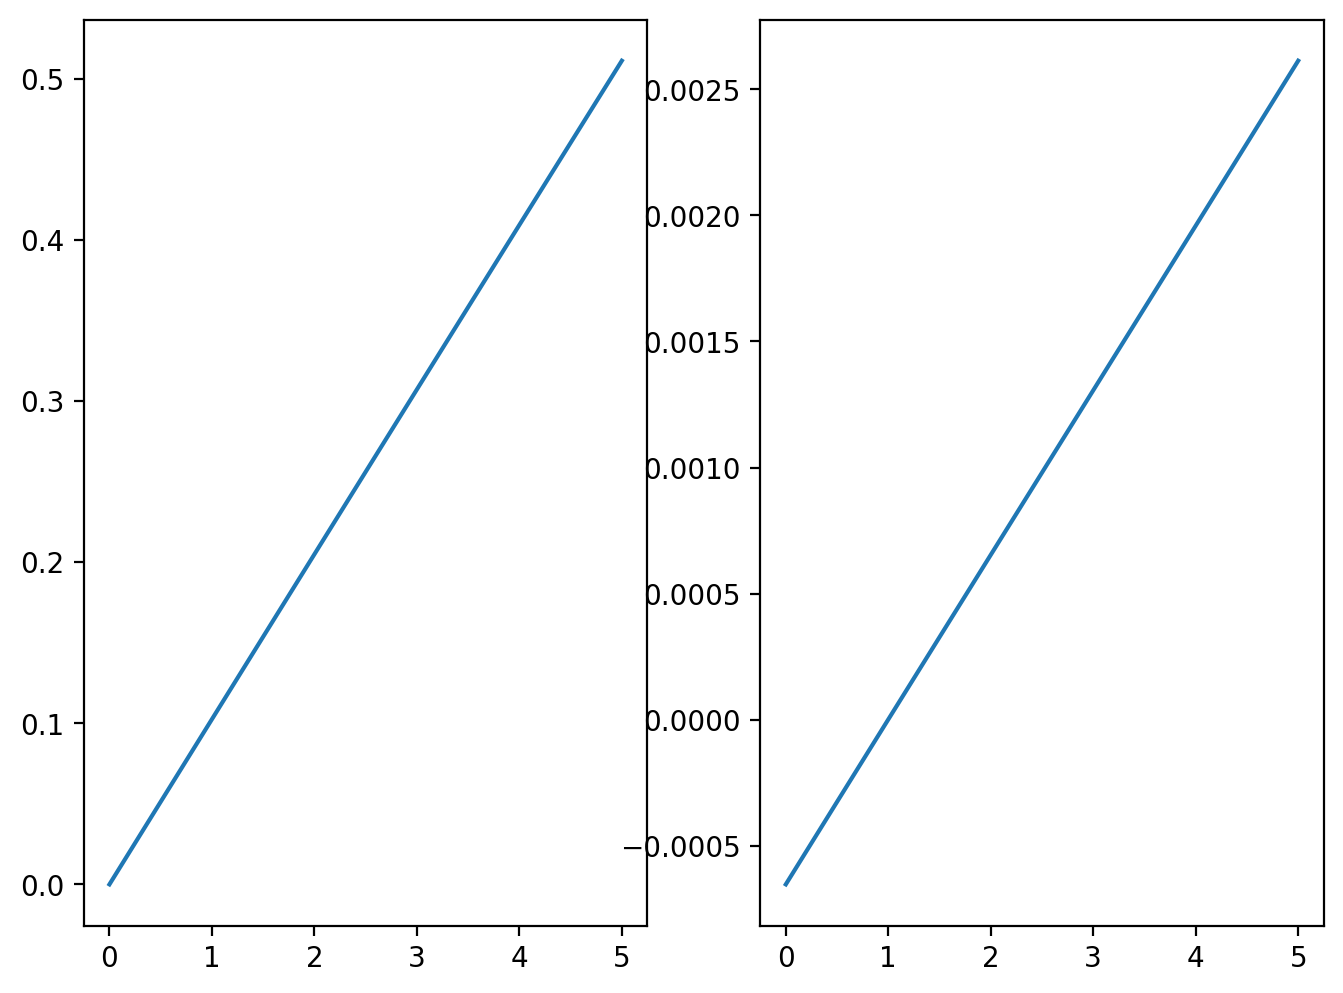

In [992]:
fig, ax = plt.subplots(ncols=2)
ax[0].plot(forces[:, 0], forces[:, -1])
ax[1].plot(forces[:, 0], forces[:, 1])


slope = (forces[-1, -1] - forces[0, -1]) / (forces[-1, 0]- forces[0, 0]) / np.pi * 180
print(slope)

dslope = (forces[-1, 1] - forces[0, 1]) / (forces[-1, 0] - forces[0, 0]) / np.pi * 180
print(dslope)

# Model with track body off

In [1018]:
aoasys = scio.loadmat('./output/simple_HALE_uvlm_delta_ntb_alpha0400_lm1_rom1_nmodes20/simple_HALE_uvlm_delta_ntb_alpha0400_lm1_rom1_nmodes20/simple_HALE_uvlm_delta_ntb_alpha0400_lm1_rom1_nmodes20.linss.mat')
uvlmsys = scio.loadmat('./output/simple_HALE_uvlm_delta_ntb_alpha0400_lm1_rom1_nmodes20/simple_HALE_uvlm_delta_ntb_alpha0400_lm1_rom1_nmodes20/simple_HALE_uvlm_delta_ntb_alpha0400_lm1_rom1_nmodes20.uvlmss.mat')

In [1025]:
uvlm_nl = np.loadtxt('../07_ForceProfile/results/simple_HALE_uvlm.txt')
uvlm_nl[:, 1:] /= qs

In [1026]:
alpha0 = 4* np.pi/180
alpha_min = 0
alpha_max = 5 * np.pi/180
# we need to compute the steady state transfer function of the discrete time uvlm
H0 = uvlmsys['C'].dot(np.linalg.inv(np.eye(uvlmsys['A'].shape[0]) - uvlmsys['A']).dot(uvlmsys['B'])) + uvlmsys['D']
    
cga = algebra.quat2rotation(algebra.euler2quat(np.array([0, alpha0, 0])))

vx_ind = 20 # x_a input index
vz_ind = 22 # z_a input index
theta_index = 27
    
forces = np.zeros((n_evals, 4))
for i_alpha, dalpha in enumerate(np.linspace(alpha_min, alpha_max, n_evals)-alpha0):
    alpha = alpha0 + dalpha  # rad
    deuler = np.array([0, dalpha, 0])
    euler0 = np.array([0, alpha0, 0])

    u = np.zeros((uvlmsys['B'].shape[1]))  # input vector
    V0 = np.array([-1, 0, 0], dtype=float) * u_inf  #G
    Vp = V0  #G
    
    dvg = Vp - V0  # G
    dva = cga.T.dot(dvg)  # A
    dvz = dva[2]
    dvx = dva[0]
        
    # Need to scale the mode shapes by the rigid body mode factor
    u[vx_ind] = dvx / aoasys['mode_shapes'][-9,0]
    u[vz_ind] = dvz / aoasys['mode_shapes'][-7,2]
        
    # and the same with the output forces
    flin = H0.dot(u)[:3].real / aoasys['mode_shapes'][-9,0]  # A

    F0A = aoasys['forces_aero_beam_dof'][0, :3] / aoasys['mode_shapes'][-9,0]  # A - forces at the linearisation
    LD0 = cga.dot(F0A)  # Lift and drag at the linearisation point
    
    forces[i_alpha, 0] = (alpha0 + dalpha) * 180 / np.pi # deg
    LD = LD0 + algebra.der_Ceuler_by_v(euler0, F0A).dot(deuler) + cga.dot(flin)  # stability axes
    forces[i_alpha, 1:] = LD / qs

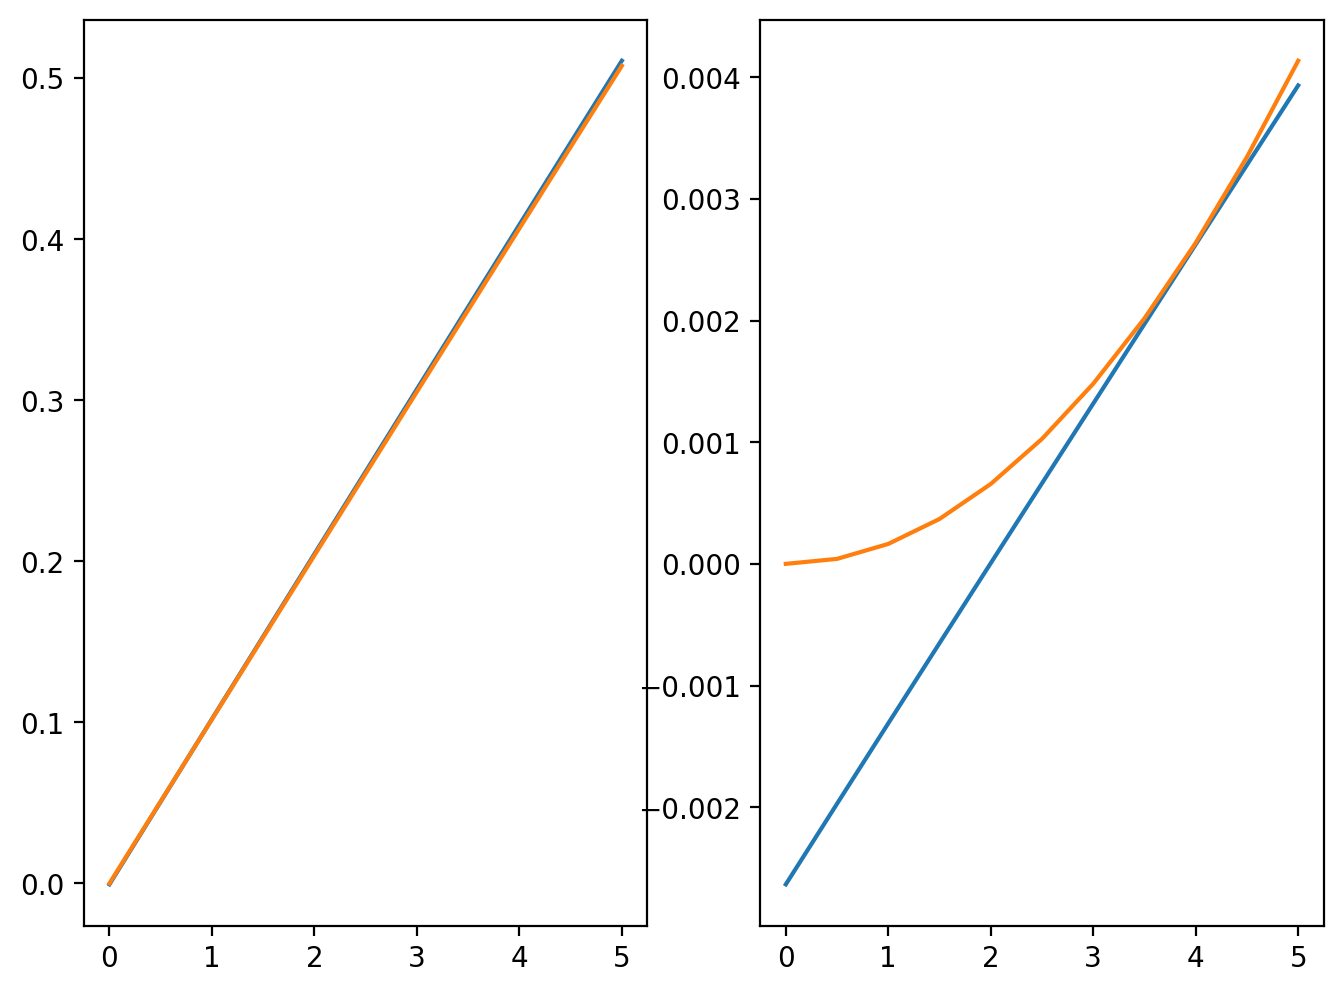

In [1029]:
fig, ax = plt.subplots(ncols=2)
ax[0].plot(forces[:, 0], forces[:, -1])
ax[0].plot(uvlm_nl[:, 0], uvlm_nl[:, -1])
ax[1].plot(forces[:, 0], forces[:, 1])
ax[1].plot(uvlm_nl[:, 0], uvlm_nl[:, 1])

In [1033]:
aoasys['mode_shapes'][-9:, 9]

array([-6.84021681e-04, -3.65131698e-11,  5.70856567e-02,  2.03636152e-08,
        6.00956777e-03,  5.56324324e-09, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00])

In [1093]:
alpha0 = 4* np.pi/180
alpha_min = 0
alpha_max = 5 * np.pi/180
n_evals = 6
forces = np.zeros((n_evals, 4))
for i_alpha, dalpha in enumerate(np.linspace(alpha_min, alpha_max, n_evals)-alpha0):


    deuler = np.array([0, dalpha, 0])
    euler0 = np.array([0, alpha0, 0])
    u = np.zeros((uvlmsys['B'].shape[1]))  # input vector


    cga = algebra.quat2rotation(algebra.euler2quat(euler0))
    # cga = algebra.quat2rotation(algebra.euler2quat(alpha0))
    vg = np.array([-1, 0, 0])
    va = cga.T.dot(vg)

    print(va)
    dvp = algebra.der_Ceuler_by_v(euler0, vg).dot(deuler)
    print(dvp)

    vp = algebra.quat2rotation(algebra.euler2quat(euler0 + deuler)).T.dot(vg)
    print(vp)

    dvx = dvp[0]
    dvz = dvp[2]

    theta_index = 27
    u[vx_ind] = dvx / aoasys['mode_shapes'][-9,0]
    u[vz_ind] = dvz/  aoasys['mode_shapes'][-7,2]
    u[theta_index] = deuler[1]

    df_ap = H0.dot(u)[:3].real / aoasys['mode_shapes'][-9,0]

    F0A = aoasys['forces_aero_beam_dof'][0, :3] / aoasys['mode_shapes'][-9,0]  # A - forces at the linearisation
    LD0 = cga.dot(F0A)  # Lift and drag at the linearisation point

    dLD = algebra.der_Ceuler_by_v(euler0, F0A).dot(deuler) + algebra.quat2rotation(algebra.euler2quat(euler0)).dot(df_ap)
#     dLD = algebra.quat2rotation(algebra.euler2quat(euler0 + deuler)).dot(df_ap)

    LD = (LD0 + dLD)

    forces[i_alpha, 0] = (alpha0 + dalpha) * 180 / np.pi # deg
    forces[i_alpha, 1:] = LD / qs

[-0.99756405  0.         -0.06975647]
[-0.00486992  0.         -0.06964311]
[-1.  0.  0.]
[-0.99756405  0.         -0.06975647]
[-0.00365244  0.         -0.05223233]
[-0.9998477   0.         -0.01745241]
[-0.99756405  0.         -0.06975647]
[-0.00243496  0.         -0.03482155]
[-0.99939083  0.         -0.0348995 ]
[-0.99756405  0.         -0.06975647]
[-0.00121748  0.         -0.01741078]
[-0.99862953  0.         -0.05233596]
[-0.99756405  0.         -0.06975647]
[0. 0. 0.]
[-0.99756405  0.         -0.06975647]
[-0.99756405  0.         -0.06975647]
[0.00121748 0.         0.01741078]
[-0.9961947   0.         -0.08715574]


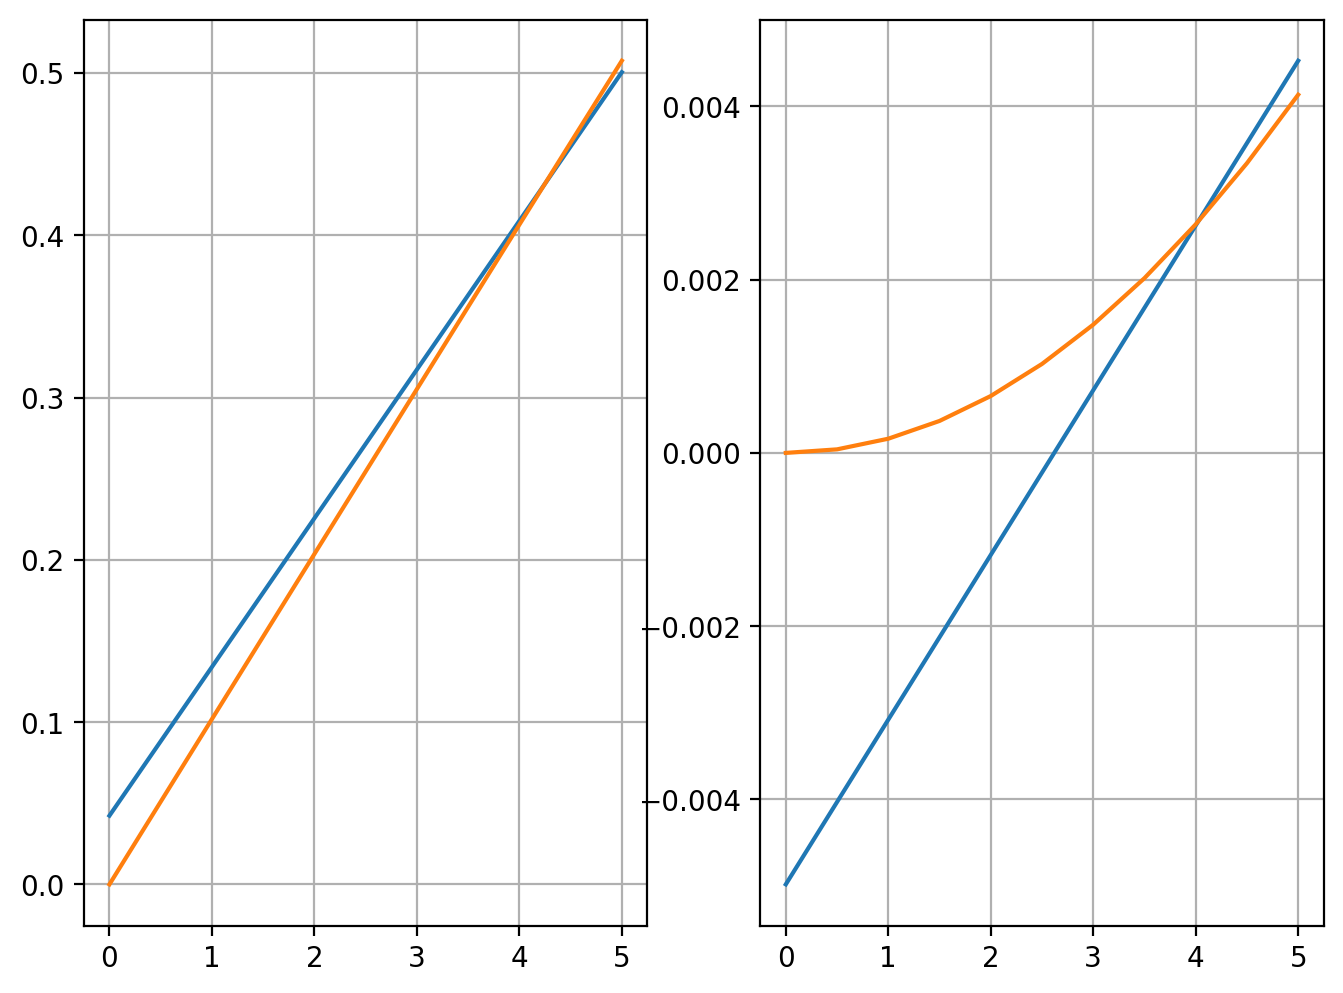

In [1094]:
fig, ax = plt.subplots(ncols=2)
ax[0].plot(forces[:, 0], forces[:, -1])
ax[0].plot(uvlm_nl[:, 0], uvlm_nl[:, -1])
ax[1].plot(forces[:, 0], forces[:, 1])
ax[1].plot(uvlm_nl[:, 0], uvlm_nl[:, 1])
ax[0].grid()
ax[1].grid()

In [1097]:
np.linspace(0, 1, 1)

array([0.])